패키지 로드

In [2]:
import pandas as pd
import numpy as np
import csv
from collections import Counter
# 워드클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

In [4]:
# 리뷰 출력시 ... 없이 전부 나오게 설정
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [3]:
kurly_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kurly_data_analysis.csv", index_col=0)
workerbee_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_analysis.csv", index_col=0)
kakao_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kakao_data_analysis.csv", index_col=0)

### 함수 설정

In [5]:
def kw_in_df(data, keyword):
    print("'", keyword, "' 가 포함된 리뷰 총", len(data[data['ReviewText'].apply(lambda x:keyword in x)]['ReviewText']),'건')
    return data[data['ReviewText'].apply(lambda x:keyword in x)]['ReviewText']

In [6]:
def kw_in_nouns(data, keyword):
    print("'", keyword, "' 가 포함된 리뷰 총", len(data[data['token_nouns_bareun'].apply(lambda x:keyword in x)]['ReviewText']),'건')
    return data[data['token_nouns_bareun'].apply(lambda x:keyword in x)]['ReviewText']

In [7]:
def kw_in_token(data, keyword):
    print('전체 리뷰', len(data), '건 중', "'", keyword, "' 가 포함된 리뷰 총", len(data[(data['token_nouns_bareun']+data['token_verbs_bareun']).apply(lambda x:keyword in x)]['ReviewText']),'건')
    return data[(data['token_nouns_bareun']+data['token_verbs_bareun']).apply(lambda x:keyword in x)]['ReviewText']

In [8]:
def frequency_analysis(data, n):
    words = pd.DataFrame(Counter(sum(data.to_list(), [])).most_common(n), columns = ['Token','Frequency'])
    return words

In [9]:
def wc_kw(data, kw_option, keyword):
    if kw_option == 1: # 1은 용언 키워드, 2는 명사 키워드
        print(keyword, '키워드가 포함된 리뷰의 용언 워드클라우드 시각화')
        return wc_analysis(data[data['ReviewText'].apply(lambda x:keyword in x)]['token_verbs_bareun'])
    elif kw_option == 2:
        print(keyword, '키워드가 포함된 리뷰의 명사 워드클라우드 시각화')
        return wc_analysis(data[data['ReviewText'].apply(lambda x:keyword in x)]['token_nouns_bareun'])
    elif kw_option == 3:
        print(keyword, '키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화')
        return wc_analysis(data[data['tokens'].apply(lambda x:keyword in x)]['tokens'])
    else:
        return print('옵션 확인')

In [10]:
#워드클라우드 함수
def wc_analysis(data):
    words = dict(Counter(sum(data.to_list(), [])).most_common(300))
    #img = Image.open("C:/Users/NT550-048/Desktop/잇더/rice.jpg")
    #imgArray = np.array(img)
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='black',colormap = "Accent_r",
                        width=800, height=500).generate_from_frequencies(words)
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud) 
    plt.axis('off')
    plt.show()

In [11]:
def product_kw_frequency(data, keyword):
    return data[(data['token_nouns_bareun']+data['token_verbs_bareun']).apply(lambda x:keyword in x)]['ProductName'].value_counts()

In [12]:
def kw_rate_list(data, keyword_list):

    for keyword in keyword_list:
        print('전체 리뷰', len(data), '건 중 "', keyword, '" 가 포함된 리뷰 비율 :', round((len(data[(data['token_nouns_bareun']+data['token_verbs_bareun']).apply(lambda x:keyword in x)]) / len(data))*100, 2), '%')
        #return round((len(data[(data['token_nouns_bareun']+data['token_verbs_bareun']).apply(lambda x:keyword in x)]) / len(data))*100, 2)
    #return round((len(data[(data['token_nouns_bareun']+data['token_verbs_bareun']).apply(lambda x:keyword in x)]) / len(data))*100, 2)

In [13]:
def kw_rate(data, keyword):
    return round((len(data[(data['token_nouns_bareun']+data['token_verbs_bareun']).apply(lambda x:keyword in x)]) / len(data)), 4)
    #return round((len(data[(data['token_nouns_bareun']+data['token_verbs_bareun']).apply(lambda x:keyword in x)]) / len(data))*100, 2)

### 카카오톡선물하기

In [ ]:
kakao_product = []
for p_code in kakao_data['ProductCode'].unique():
    data = kakao_data[kakao_data['ProductCode']==p_code]
    #print(p_code)
    kakao_product.append([p_code, len(data), kw_rate(data, '고급'), kw_rate(data, '깔끔'), kw_rate(data, '예쁘'), kw_rate(data, '귀엽')])
    print(p_code, '완료!')
    #kw_rate(data, ['고급', '깔끔', '예쁘', '귀엽'])

In [128]:
kakao_package = pd.DataFrame(kakao_product, columns=['Code', 'n_review', '고급', '깔끔', '예쁘', '귀엽'])

In [129]:
kakao_package.to_excel(r'C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\analysis\kakao_package.xlsx')

In [33]:
kakao_data['tokens'] = kakao_data['token_nouns_bareun'] + kakao_data['token_verbs_bareun']

In [32]:
kakao_data.head(1)

ProductCode                                 ProductName brand  \
0      2270784  국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5  비마스터   

   sellingPrice  wishCount  reviewCount product_tag2  \
0         27800       2228         1152           []   

                                                                                                                                   ReviewText  \
0  숙취후 아침에 따뜻한 물에 한포 간편히 타먹을수 있어서 좋드라구요. 스틱형이라 휴대도간편하고  물에도 잘녹아요. 주머니나 가방안에 휴대하기도간편해서 허기졌을때 간편하게 당충전하기에도 너무좋습니다. 국내산꿀이라 믿을수있고 맛도좋아요. 배송엄청빠르네요   

   rating review_tag1 review_tag2           ReviewTime  sentiment_label  \
0       4          응원        직장동료  2023-04-10 14:16:48                1   

   sentiment_score  \
0         0.990664   

                                            token_nouns_bareun  \
0  [숙취, 후, 아침, 물, 휴대, 물, 주머니, 가방, 안, 휴대, 당, 충전, 국내, 산꿀, 맛, 배송]   

                       token_verbs_bareun  
0  [따뜻하, 타, 간편하, 녹, 간편하, 허기지, 간편하, 믿, 빠르]

### 컬리

In [159]:
kurly_data.head(1)

ProductCode MemberGrade MemberName          ProductName  \
0      5136210          일반        박**  [바로생활] 아카시아꿀 스틱 10포   

                                          ReviewText  ReviewTime  ReviewLike  \
0  작은 박스로 2개 (10개씩 들어있어 20개 네요 ) 주문 했습니다.  의심이 많은...  2023.06.23           0   

   sentiment_label  sentiment_score  \
0                1          0.99409   

                                  token_nouns_bareun  \
0  [박스, 2, 10, 20, 네, 주문, 의심, 타입, 주문, 안심, 타입, 요즘,...   

                                  token_verbs_bareun  
0  [작, 많, 없, 쓰, 나, 없, 맏아보, 힘들, 반갑, 예쁘, 작, 예쁘, 덥, ...

In [31]:
kurly_data['tokens'] = kurly_data['token_nouns_bareun'] + kurly_data['token_verbs_bareun'] 

In [161]:
kurly_frequency = frequency_analysis(kurly_data['tokens'], 500)

In [162]:
kurly_frequency.to_excel(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\frequency_excel\kurly_frequency.xlsx")

In [163]:
kurly_noun_frequency = frequency_analysis(kurly_data['token_nouns_bareun'],500)

In [164]:
kurly_noun_frequency.to_excel(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\frequency_excel\kurly_noun_frequency.xlsx")

In [14]:
kurly_data.head(1)

ProductCode MemberGrade MemberName          ProductName  \
0      5136210          일반        박**  [바로생활] 아카시아꿀 스틱 10포   

                                                                                                                                                                                                                                                                                                                       ReviewText  \
0  작은 박스로 2개 (10개씩 들어있어 20개 네요 ) 주문 했습니다.  의심이 많은 타입이라 뭐든 한번에 주문한적이 없고 ,,  꼭 먹어보고 써보고 나서야 안심하는 타입입니다 ㅋ    요즘은..아카시아가 많이 없어 ..  아카시아 향 맏아보기도 정말 힘든데.. 아카시아 꿀이라니  ^^  너무 반갑고 예뻐 주문해 봤습니다.   일단 너무 작고 예쁘네요 .  더운 여름에 밖에서 운동하는 딸을 위해 건강한 간식으로  챙겨 주려고 합니다.   예쁜 포장이라 예민한 아이 마음에도 쏙 드는 듯 합니다.   배송도 빠르고 좋은제품 좋은 가격에 잘 산걸 같아  기분 좋네요.^^   

   ReviewTime  ReviewLike  sentiment_label  sentiment_score  \
0  2023.06.23           0                1          0.99409   

                                                                                                                                                                      token_nouns_bareun  \
0  ['박스', '2', '10', '20', '네', '주문', '의심', '타입', '주문', '안심', '타입', '요즘', '아카시아', '아카시아', '향', '아카시아', '주문', '여름', '밖', '운동', '딸', '건강', '간식', '포장', '아이', '마음', '배송', '제품', '가격', '기분']   

                                                                                            token_verbs_bareun  
0  ['작', '많', '없', '쓰', '나', '없', '맏아보', '힘들', '반갑', '예쁘', '작', '예쁘', '덥', '위하', '챙기', '예쁘', '예민하', '빠르', '살']

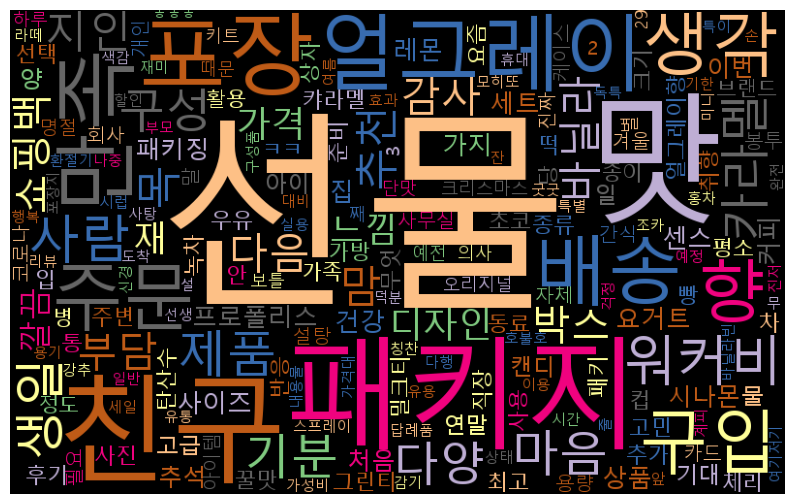

In [23]:
wc_analysis(workerbee_data['token_nouns_bareun'])

컬리 제주꿀스틱 분석

In [207]:
kurly_data['ProductName'].unique()

array(['[바로생활] 아카시아꿀 스틱 10포', '[제주벌꿀영농조합법인] 제주 벌꿀 (스틱형)',
       '[제주벌꿀영농조합법인] 제주 감귤꽃 벌꿀(스틱형)', '[바로생활] 야생화꿀 스틱 10포',
       '[바로생활] 때죽꿀 스틱 10포', '[올리] 아카시아꿀 스틱 10포', '[올리] 꿀스틱 세트',
       '[올리] 꿀세트 쇼핑백', '[미엘드] 스틱벌꿀 2종 선물세트', '[YOZM] 허니스틱 10포',
       '[콤비타] UMF5+ 마누카꿀 사셰 꿀스틱 30입', '[선물세트] QB 마누카 꿀스틱 UMF 15+ 30포',
       '[선물세트] QB 마누카 꿀스틱 UMF 5+ 30포', '[송강당] 들과 바람 머금은 꽃꿀 스틱',
       '[허니바이허니] 올인원 허니스틱 (90포)', '[콤비타] 뉴질랜드 마누카꿀 5+ 사셰 (12일분)',
       '[콤비타] 뉴질랜드 마누카꿀 5+ 사셰', '[선물세트][콤비타] UMF15+ 마누카꿀 & 사셰 허니스틱 세트',
       '[선물세트][콤비타] UMF18+ 마누카꿀 & 사셰 허니스틱 세트',
       '[콤비타] 프로폴리스 & 마누카꿀 종합 선물세트(UMF5+꿀스틱2/스프레이1/치약2)',
       '[잭스허니] 마누카 선물세트'], dtype=object)

In [209]:
kurly_data[kurly_data['ProductName']=='[제주벌꿀영농조합법인] 제주 감귤꽃 벌꿀(스틱형)'].head(1)

ProductCode MemberGrade MemberName                  ProductName  \
2061      5026039          퍼플        강**  [제주벌꿀영농조합법인] 제주 감귤꽃 벌꿀(스틱형)   

                                      ReviewText  ReviewTime  ReviewLike  \
2061  스틱이라 간편하게 섭취할 수 있어 좋아요ㅎㅎ 목 아플때 먹으려고 구매했어요!  2022.04.23           0   

      sentiment_label  sentiment_score token_nouns_bareun token_verbs_bareun  \
2061                1         0.991944            [섭취, 목]          [간편하, 아프]   

                tokens  
2061  [섭취, 목, 간편하, 아프]

In [25]:
kurly_jeju = kurly_data[kurly_data['ProductCode']==5026039]

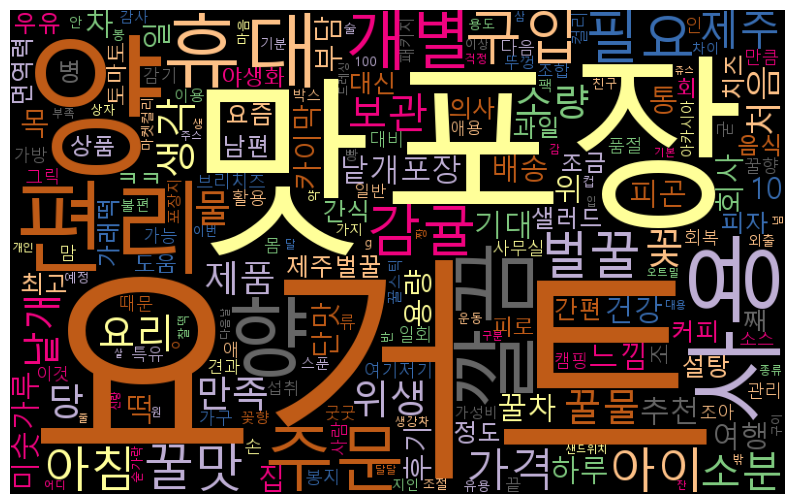

In [228]:
wc_analysis(kurly_jeju['token_nouns_bareun'])

제주 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


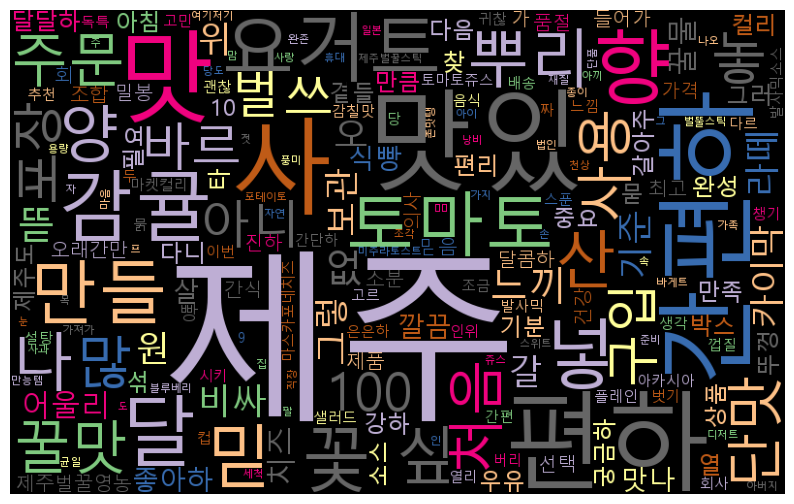

In [248]:
wc_kw(kurly_jeju, 3, '제주')

In [257]:
kw_in_token(kurly_jeju, '제주')

전체 리뷰 5472 건 중 ' 제주 ' 가 포함된 리뷰 총 97 건


763                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     제주벌꿀이라고 믿고 구매했어요 1회포장이라 편리하네요
776                                                                                                                                                                                                                                                                                                               

In [ ]:
jeju_jeju = kurly_jeju[kurly_jeju['ReviewText'].apply(lambda x:'제주' in x)]['ReviewText']

In [259]:
jeju_jeju.to_excel(r'C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\analysis\jeju_jeju.xlsx')

컬리 리뷰데이터 내 레시피 탐색

In [206]:
kw_in_df(kurly_data, '요거트')

' 요거트 ' 가 포함된 리뷰 총 1442 건


6                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  그릭 요거트에 넣어서 잘 먹고있어용
11                                                                                                                                                                                                                                                                                                                                                                                               

재구매 분석

In [195]:
kurly_repurchase = kurly_data[kurly_data['ReviewText'].apply(lambda x:'재구매' in x)]

In [205]:
kurly_repurchase.to_excel(r'C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\analysis\kurly_repurchase.xlsx')

재구매 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


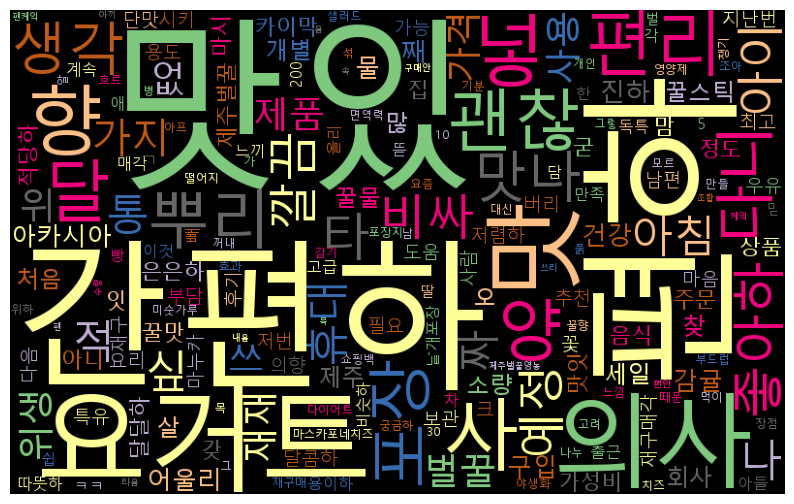

In [204]:
wc_kw(kurly_data, 3, '재구매')

패키지 인식 분석

In [ ]:
kurly_product = []
for p_code in kurly_data['ProductCode'].unique():
    data = kurly_data[kurly_data['ProductCode']==p_code]
    #print(p_code)
    kurly_product.append([p_code, len(data), kw_rate(data, '고급'), kw_rate(data, '깔끔'), kw_rate(data, '예쁘'), kw_rate(data, '귀엽')])
    print(p_code, '완료!')
    #kw_rate(data, ['고급', '깔끔', '예쁘', '귀엽'])

In [131]:
kurly_package = pd.DataFrame(kurly_product, columns=['Code', 'n_review', '고급', '깔끔', '예쁘', '귀엽'])

In [132]:
kurly_package.to_excel(r'C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\analysis\kurly_package.xlsx')

### 워커비

In [156]:
workerbee_data.head(1)

ProductCode                 ProductName  lastSalePrice  heartCount  \
0      1308881  [꿀카라멜] 워커비 허니 얼그레이 카라멜 50g           3000        7126   

   reviewCount  itemReviewNo           optionValue  userId  point  \
0          796       6390415  ['[구매단위]박스구매(12개입)']  hai***      5   

                                          ReviewText isGift  \
0  °고마운 일이 생겨, 지인분께 선물로도 드리고~ 나도 먹고! 재주문 했어요~, 포장...      F   

            ReviewTime                         token_nouns_bareun  \
0  2023-08-11 05:42:48  [일, 지인, 선물, 재, 주문, 포장, 귀엽, 얼그레이, 향, 코, 끝]   

  token_verbs_bareun  sentiment_label  sentiment_score  \
0   [고맙, 생기, 드리, 진하]                1         0.994407   

                                              tokens  
0  [일, 지인, 선물, 재, 주문, 포장, 귀엽, 얼그레이, 향, 코, 끝, 고맙, ...

In [30]:
workerbee_data['tokens'] = workerbee_data['token_nouns_bareun'] + workerbee_data['token_verbs_bareun']

In [157]:
workerbee_frequency = frequency_analysis(workerbee_data['tokens'], 500)

In [158]:
workerbee_frequency.to_excel(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\frequency_excel\workerbee_frequency.xlsx")

In [ ]:
workerbee_product = []
for p_code in workerbee_data['ProductCode'].unique():
    data = workerbee_data[workerbee_data['ProductCode']==p_code]
    #print(p_code)
    workerbee_product.append([p_code, len(data), kw_rate(data, '고급'), kw_rate(data, '깔끔'), kw_rate(data, '예쁘'), kw_rate(data, '귀엽')])
    print(p_code, '완료!')
    #kw_rate(data, ['고급', '깔끔', '예쁘', '귀엽'])

In [134]:
workerbee_package = pd.DataFrame(workerbee_product, columns=['Code', 'n_review', '고급', '깔끔', '예쁘', '귀엽'])

In [135]:
workerbee_package.to_excel(r'C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\analysis\workerbee_package.xlsx')

In [56]:
kw_rate_list(kurly_data, ['고급', '깔끔', '예쁘', '귀엽'])

전체 리뷰 10654 건 중 " 고급 " 가 포함된 리뷰 비율 : 0.31 %
전체 리뷰 10654 건 중 " 깔끔 " 가 포함된 리뷰 비율 : 3.37 %
전체 리뷰 10654 건 중 " 예쁘 " 가 포함된 리뷰 비율 : 0.87 %
전체 리뷰 10654 건 중 " 귀엽 " 가 포함된 리뷰 비율 : 0.45 %


제품 상세 분석

In [263]:
workerbee_data[workerbee_data['ProductCode']==704400].head(1)

ProductCode               ProductName  lastSalePrice  heartCount  \
3453       704400  [아카시아꿀] 워커비 보틀 오리지널 355g          24500         683   

      reviewCount  itemReviewNo    optionValue  userId  point  \
3453           93       6367328  ['[쇼핑백]선택안함']  nbo***      5   

                                         ReviewText isGift  \
3453  사무실에두고 스트레스받을때 한숟가락씩 먹고 있어요~ 디자인이 예뻐서 맘에 들어요~      F   

               ReviewTime        token_nouns_bareun token_verbs_bareun  \
3453  2023-08-08 15:59:54  [사무실, 스트레스, 숟가락, 디자인, 맘]            [두, 예쁘]   

      sentiment_label  sentiment_score                           tokens  
3453                1         0.991125  [사무실, 스트레스, 숟가락, 디자인, 맘, 두, 예쁘]

In [ ]:
kakao_data[kakao_data['ProductCode']==2270784].head(1)

In [65]:
workerbee_data[workerbee_data['ProductCode']==1764501].head(1)

ProductCode                  ProductName  lastSalePrice  heartCount  \
2790      1764501  [29CM 단독] 워커비 더블 미니팩(6개입x2)          18500         547   

      reviewCount  itemReviewNo                               optionValue  \
2790           72       6404140  ['[미니팩 선택 1]바닐라꿀 바닐라 [미니팩 선택 2] 레몬꿀 레몬']   

       userId  point  \
2790  mane***      5   

                                                              ReviewText  \
2790  구성품 패키지디자인 다 마음에 들어요 선물용이라 안먹어봐서 맛은 모르겠지만 가벼운 선물용으로는 이쁜게 최고인거 같아요    

     isGift           ReviewTime          token_nouns_bareun  \
2790      F  2023-08-13 13:08:27  [구성품, 패키지, 디자인, 마음, 맛, 최고]   

     token_verbs_bareun  sentiment_label  sentiment_score  \
2790       [모르, 가볍, 예쁘]                1         0.988717   

                                      tokens  
2790  [구성품, 패키지, 디자인, 마음, 맛, 최고, 모르, 가볍, 예쁘]

패키지 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


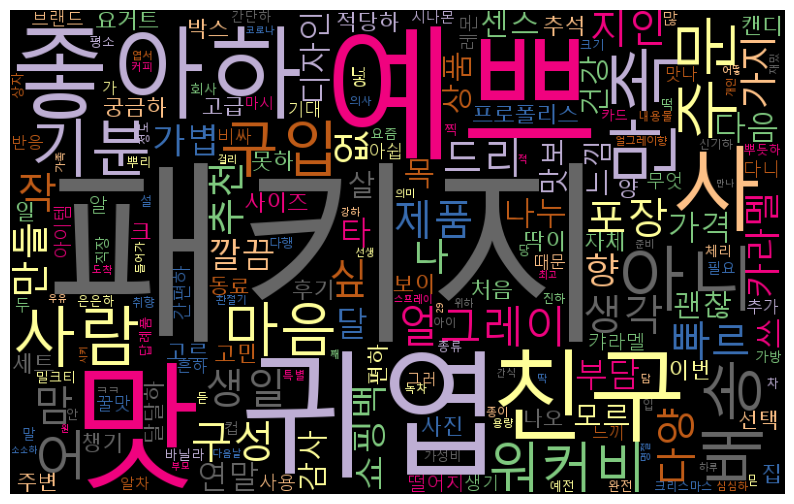

In [60]:
wc_kw(workerbee_data, 3, '패키지')

### 데이터 로드

In [ ]:
kakao_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kakao_data_analysis.csv", index_col=0)
kurly_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kurly_data_analysis.csv", index_col=0)
workerbee_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_analysis.csv", index_col=0)

In [10]:
kakao_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kakao_data_preprocessed.csv", index_col=0)
kurly_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kurly_data_preprocessed.csv", index_col=0)
workerbee_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_preprocessed.csv", index_col=0)

In [17]:
for data in [kakao_data, kurly_data, workerbee_data]:
    data['token_nouns_bareun'] = data['token_nouns_bareun'].apply(lambda x: eval(x))
    data['token_verbs_bareun'] = data['token_verbs_bareun'].apply(lambda x: eval(x))

In [4]:
kakao_data.rename(columns = {'review_text':'ReviewText'}, inplace = True)

In [13]:
kakao_data.head(1)

ProductCode                                 ProductName brand  \
0      2270784  국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5  비마스터   

   sellingPrice  wishCount  reviewCount product_tag2  \
0         27800       2228         1152           []   

                                          ReviewText  rating review_tag1  \
0  숙취후 아침에 따뜻한 물에 한포 간편히 타먹을수 있어서 좋드라구요. 스틱형이라 휴대...       4          응원   

  review_tag2           ReviewTime  sentiment_label  sentiment_score  \
0        직장동료  2023-04-10 14:16:48                1         0.990664   

                                  token_nouns_bareun  \
0  [숙취, 후, 아침, 물, 휴대, 물, 주머니, 가방, 안, 휴대, 당, 충전, 국...   

                       token_verbs_bareun  
0  [따뜻하, 타, 간편하, 녹, 간편하, 허기지, 간편하, 믿, 빠르]

### 카카오 리뷰 태그 전처리

In [13]:
kakao_data['review_tag1'].value_counts()

review_tag1
응원          739
생일          592
감사          188
위로          187
건강           28
설날           16
결혼           15
시험           15
재미           14
취업/이직        12
스승의날         10
크리스마스         9
졸업/입학         6
어버이날          4
화이트데이         4
빼빼로데이         4
새해            4
임신/출산         4
추석            3
명절선물          3
명절            3
선물            3
코로나           2
선물용           2
추석선물          2
이사/집들이        2
발렌타인데이        2
건강회복          2
아프지마          2
쾌유            1
비밀            1
피로회복          1
목감기에좋다고       1
인연            1
목감기           1
석류꿀맛최고이다      1
퓨어석류아카        1
건강영양석류        1
면역력챙기기        1
감사마음          1
연말            1
꿀빠는시간         1
회복            1
어머님선물         1
기념품           1
감사의표시         1
임직축하          1
달달하시간         1
녹차원꿀스틱        1
사과            1
달달건강꿀스틱       1
선물용으로줌        1
백일/돌          1
코로나건강         1
면역역챙기기        1
감솨            1
200일선물        1
설             1
좋습니다          1
꿀             1
벌꿀            1
프로폴리스       

In [8]:
kakao_data['review_tag2'].value_counts()

review_tag2
친구          865
직장동료        350
선/후배        209
형제/자매       121
나            97
연인           76
선생님          44
제자           37
자녀           28
부모님          26
썸            11
지인            6
조카            5
친척            2
언니            2
스트리머          1
선물            1
교회언니          1
핑크님           1
게임단톡방         1
감사합니다         1
고마운분          1
엠에이치글로비즈      1
직장            1
아들친구어머니       1
그냥선물          1
거래처선물         1
퓨어석류아카        1
동기            1
학부모님선물        1
친구딸           1
보낸이의정성        1
홀인원기념         1
나에게주는선물       1
삼실킬로미터        1
전도사님          1
학부모님          1
가족            1
생일            1
응원과건강기원       1
딸남자친구         1
건강            1
생일선물          1
선물용           1
학부형           1
형님            1
코로나응원위로       1
아이친구엄마        1
고객님           1
회원님           1
추석선물          1
동생            1
비마스터          1
학부            1
꿀             1
꿀해장           1
교회집사님         1
화줌마HZM        1
Name: count, dtype: int64

In [6]:
tag2 = ['친구', '연인', '썸', '형재/자매', '선/후배', '직장동료', '자녀', '부모님', '제자', '선생님', '나']
tag1 = ['생일', '응원', '감사', '재미', '결혼', '이사/집들이', '백일/돌', '임신/출산', '졸업/입학', '취업/이직', '시험', '위로', '사과', '반려동물', '설날', '건강', '스승의날']

In [7]:
kakao_data['review_tag1'] = kakao_data['review_tag1'].apply(lambda x:x if x in tag1 else '기타')

In [8]:
kakao_data['review_tag2'] = kakao_data['review_tag2'].apply(lambda x:x if x in tag2 else '기타')

In [36]:
kakao_data['review_tag1'].value_counts()

review_tag1
응원        739
생일        592
감사        188
위로        187
기타         92
건강         28
설날         16
시험         15
결혼         15
재미         14
취업/이직      12
스승의날       10
졸업/입학       6
임신/출산       4
이사/집들이      2
백일/돌        1
사과          1
Name: count, dtype: int64

In [35]:
kakao_data['review_tag2'].value_counts()

review_tag2
친구      865
직장동료    350
선/후배    209
기타      179
나        97
연인       76
선생님      44
제자       37
자녀       28
부모님      26
썸        11
Name: count, dtype: int64

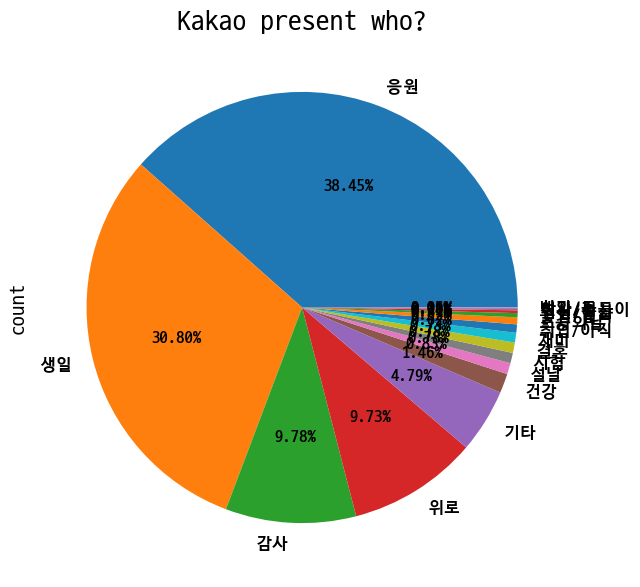

In [14]:
plt.figure(figsize=(7,7))
plt.title('Kakao present who?' , fontsize=20)
plt.ylabel('who' , fontsize=15)
kakao_data['review_tag1'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                                  textprops = {'fontsize' : 12 ,
                                                               'weight' : 'bold'})
plt.show()

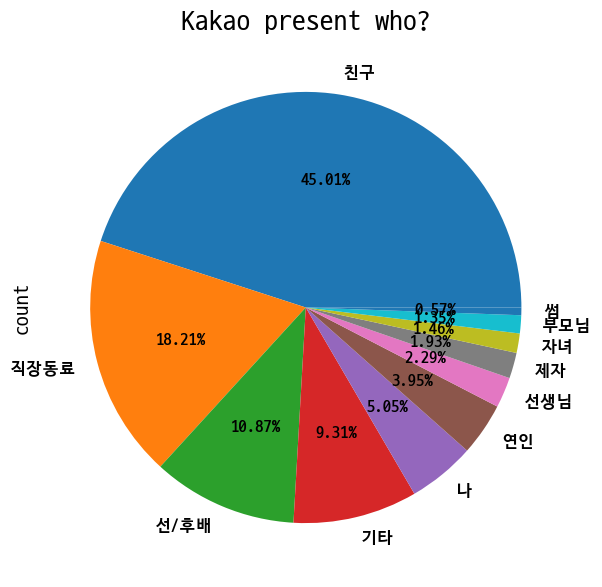

In [15]:
plt.figure(figsize=(7,7))
plt.title('Kakao present who?' , fontsize=20)
plt.ylabel('who' , fontsize=15)
kakao_data['review_tag2'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                                  textprops = {'fontsize' : 12 ,
                                                               'weight' : 'bold'})
plt.show()

### 카톡 선물하기 분석

In [37]:
kakao_data['tokens'] = kakao_data['token_nouns_bareun'] + kakao_data['token_verbs_bareun']

In [145]:
kakao_data.head(1)

ProductCode                                 ProductName brand  \
0      2270784  국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5  비마스터   

   sellingPrice  wishCount  reviewCount product_tag2  \
0         27800       2228         1152           []   

                                          ReviewText  rating review_tag1  \
0  숙취후 아침에 따뜻한 물에 한포 간편히 타먹을수 있어서 좋드라구요. 스틱형이라 휴대...       4          응원   

  review_tag2           ReviewTime  sentiment_label  sentiment_score  \
0        직장동료  2023-04-10 14:16:48                1         0.990664   

                                  token_nouns_bareun  \
0  [숙취, 후, 아침, 물, 휴대, 물, 주머니, 가방, 안, 휴대, 당, 충전, 국...   

                       token_verbs_bareun  \
0  [따뜻하, 타, 간편하, 녹, 간편하, 허기지, 간편하, 믿, 빠르]   

                                              tokens  
0  [숙취, 후, 아침, 물, 휴대, 물, 주머니, 가방, 안, 휴대, 당, 충전, 국...

In [149]:
kakao_frequency = frequency_analysis(kakao_data['tokens'], 500)

In [150]:
kakao_frequency.to_excel(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\frequency_excel\kakao_frequency.xlsx")

In [35]:
kakao_data[kakao_data['ProductName']=='이십삼쩜오(-23.5) 100% 국내산 천연 벌꿀 허니스틱 30포 (쇼핑백 증정)'].head(1)

ProductCode                                    ProductName brand  \
1430      5709993  이십삼쩜오(-23.5) 100% 국내산 천연 벌꿀 허니스틱 30포 (쇼핑백 증정)  23.5   

      sellingPrice  wishCount  reviewCount      product_tag2    ReviewText  \
1430         29900        973           77  ['PACKAGE_GIFT']  네, 아주 맛있습니다.   

      rating review_tag1 review_tag2           ReviewTime  sentiment_label  \
1430       4          생일          친구  2023-05-14 03:18:56                1   

      sentiment_score token_nouns_bareun token_verbs_bareun  
1430         0.942526                 []               [맛있]

In [466]:
product_kw_frequency(kakao_data, '고급')

ProductName
국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5            96
이십삼쩜오(-23.5) 100% 국내산 천연 벌꿀 허니스틱 30포 (쇼핑백 증정)          8
"하루한포" 국내산 100% 천연꿀 허니스틱30포                            3
국산 프로폴리스 혼합 천연벌꿀 허니스틱(60스틱)답례품 비마스터-23.5               2
국산 아카시아 천연벌꿀 허니스틱 (60스틱)답례품 비마스터-23.5 쇼핑백증정            2
미엘드 국내산 100% 천연벌꿀 허니스틱 2종(아카시아,야생화) 선물세트               2
국산 천연 벌꿀 아카시아 야생화 허니스틱 2구 선물세트                         2
끌레르허니 스틱 천연벌꿀 아카시아꿀 야생화꿀 밤꿀 10포 선물용 답례품                2
국산 천연 벌꿀 아카시아꿀 허니스틱 틴케이스 15포                           2
미엘드 국내산 100% 천연 벌꿀 no.5 혼합선물세트 (허니스틱+병꿀 / 결혼식,답례품)     2
끌레르허니 스틱 천연벌꿀 아카시아꿀 야생화꿀 밤꿀 30포 선물용                    2
"[꿀프로] -타이틀리스트PRO V1 골프공 혼합 SET" / 아카시아+프로폴리스 꿀스틱      1
[허니바이허니] "국산 천연벌꿀" 허니스틱 4구 틴케이스 선물세트                   1
끌레르허니 스틱 천연벌꿀 아카시아꿀 야생화꿀 밤꿀 36포 선물용                    1
[허니바이허니] "국산 천연벌꿀" 허니스틱 2구 틴케이스 선물세트                   1
Name: count, dtype: int64

In [467]:
kw_rate(kakao_data[kakao_data['ProductName']=='국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5'], ['고급', '깔끔', '예쁘', '귀엽'])

전체 리뷰 1000 건 중 " 고급 " 가 포함된 리뷰 비율 : 9.6 %
전체 리뷰 1000 건 중 " 깔끔 " 가 포함된 리뷰 비율 : 3.1 %
전체 리뷰 1000 건 중 " 예쁘 " 가 포함된 리뷰 비율 : 0.9 %
전체 리뷰 1000 건 중 " 귀엽 " 가 포함된 리뷰 비율 : 0.0 %


In [138]:
kw_in_token(workerbee_data[workerbee_data['ProductCode']==1761413], '귀엽')

전체 리뷰 313 건 중 ' 귀엽 ' 가 포함된 리뷰 총 112 건


2482    친구 자취 집들이 선물로 주문했어요. 캐릭터도 귀엽고 맛은 제가 안봐서 모르겠지만 ...
2484      패키지도 귀엽고 잔도 있어서 친구 선물로 구입했어요. 친구도 만족해해서 좋았습니다ㅎㅎ
2485    달달함을 선물할 수 있어 좋네요 !  귀여운 패키지에 컵까지 구성되어 있어 알차네요...
2486    생일선물로 딱 좋은 구성이에요 귀엽고 유니크하고 선물용으로 넘넘 행복입니다 강추강추...
2496    직장 동료 생일 선물 고민하다가 패키지가 너무 귀여워서 선물했는데 엄청 마음에 들어...
                              ...                        
2774                크리스마스 교환 선물용으로 구입했어요. 패키지가 넘 귀엽네요^_^ 
2775    잔도 카라멜도 꿀도 다 너무 귀엽네요. 선물하기 좋은 구성이에요. 꿀 어서 맛보겠습...
2776    귀여운 걸 좋아하는 친구라 고민하다가 골랐는데 다행히 아주 만족입니다 … 제것도 하...
2777    친구가 컵도 귀엽고 꿀도 고급스러운 맛이 난다고 좋아했아요. 뿌듯했습니다!! 선물로...
2788    연말 같이 일하는 동료들에게 줄 선물로 구입했어요 유리잔도 너무 예쁘고 모두 아기자...
Name: ReviewText, Length: 112, dtype: object

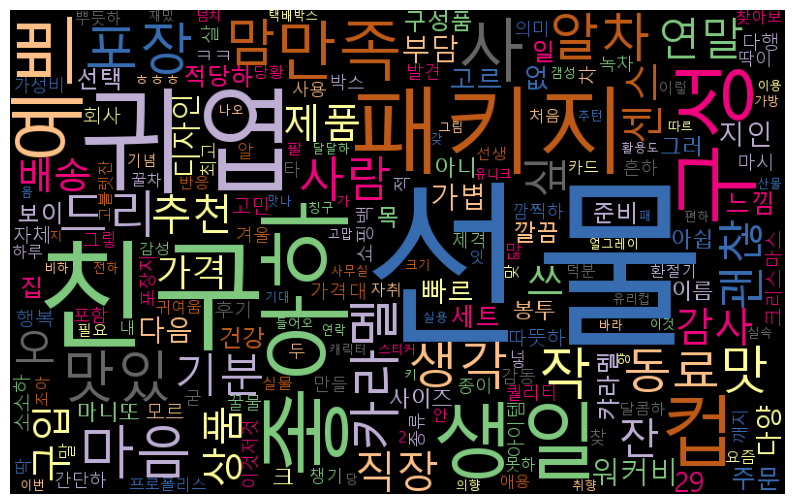

In [142]:
wc_analysis(workerbee_data[workerbee_data['ProductCode']==1761413]['token_verbs_bareun']+
            workerbee_data[workerbee_data['ProductCode']==1761413]['token_nouns_bareun'])

In [397]:
frequency_analysis(workerbee_data[workerbee_data['ProductName']=='[레몬꿀] 워커비 미니팩 레몬 120g(10gx12ea)']['token_nouns_bareun'], 20)

Token  Frequency
0     선물         40
1      맛         28
2     레몬         23
3    패키지         14
4      물         12
5     포장         11
6    탄산수         11
7     친구          9
8      향          8
9      당          6
10     양          6
11    가격          6
12    기분          5
13   워커비          5
14    만족          5
15   코로나          5
16    주문          5
17    이거          5
18    휴대          4
19    꿀맛          4

박스 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


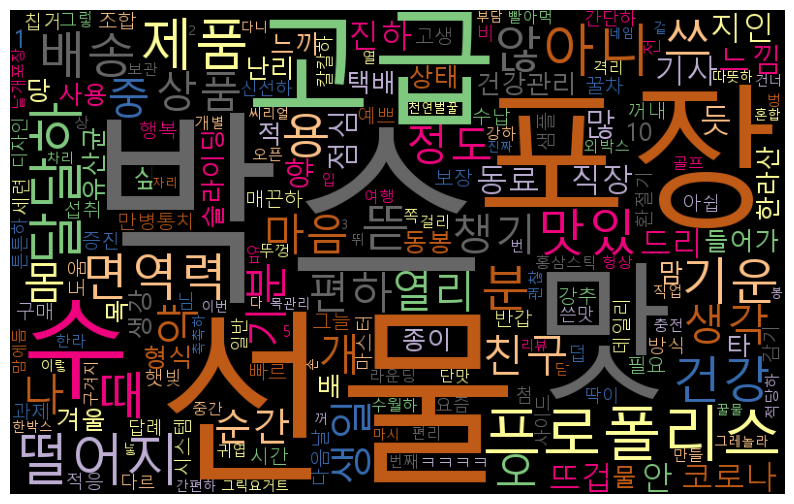

In [46]:
wc_kw(kakao_data, 3, '박스')

때 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


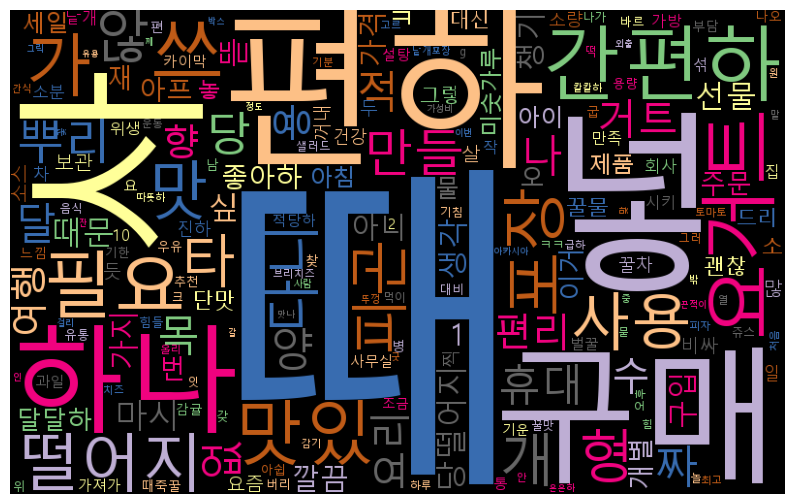

In [97]:
wc_kw(kurly_data, 3, '때')

In [64]:
kurly_jeju = kurly_data[kurly_data['ProductCode']==5026039]

패키지 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


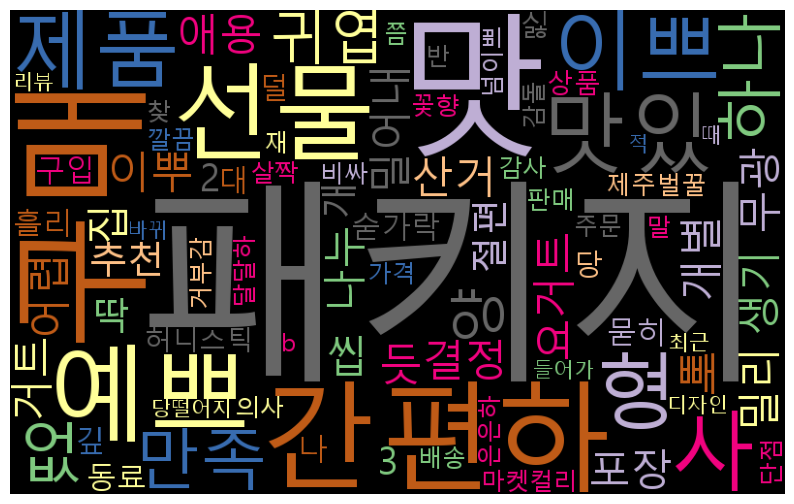

In [69]:
wc_kw(kurly_jeju, 3, '패키지')

귀엽 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


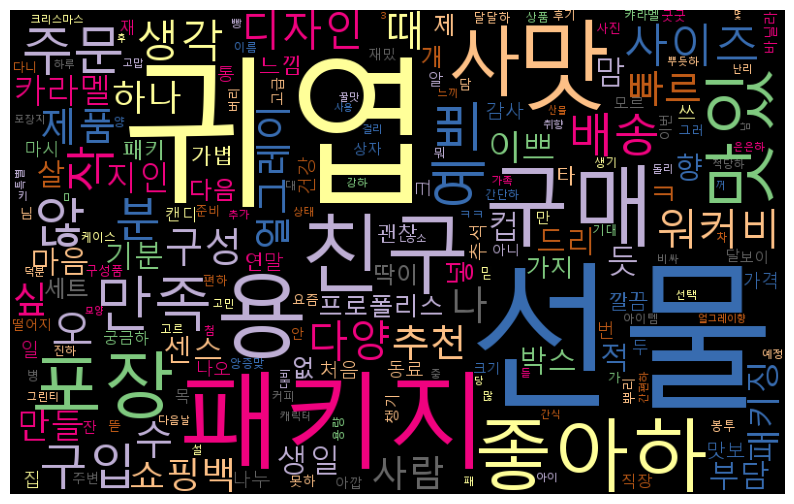

In [108]:
wc_kw(workerbee_data, 3, '귀엽')

In [392]:
product_kw_frequency(workerbee_data, '귀엽')

ProductName
[꿀카라멜] 워커비 허니 얼그레이 카라멜 50g           175
[꿀선물] 워커비 기프트세트 미니자(8개입)             169
[꿀선물] 워커비 기프트세트 미니자(3-4개입)           162
[29CM 단독] 워커비 해피팩                    111
[보이스케어 KIT] 워커비 프로폴리스 스프레이 & 캔디       60
[킷캔] 우리쌀 꿀떡만들기 키트                     58
워커비 무설탕 프로폴리스 캔디 24정                  48
[꿀카라멜] 워커비 허니 그린티 카라멜 50g             30
[고마운 마음] DEAR. FRIENDS                28
[꿀선물] 워커비 기프트세트 보틀                    23
[바닐라꿀] 워커비 보틀 바닐라 355g                20
[꿀선물] 워커비 기프트세트 콤보                    18
[29CM 단독] 워커비 더블 미니팩(6개입x2)           17
[아카시아꿀] 워커비 보틀 오리지널 355g              16
[꿀선물] 워커비 기프트세트 미니팩                   14
[꿀선물] 허니 홈카페 키트                       13
워커비 허니 바닐라 30g                        12
[레몬꿀] 워커비 미니팩 레몬 120g(10gx12ea)       12
워커비 허니 레몬 30g                         10
[존경의 마음] DEAR. TEACHERS                8
[레몬꿀] 워커비 보틀 레몬 355g                   7
[감사한 마음] DEAR. PARENTS                 7
워커비 허니 모히또 30g                         6
[건강기능식품] 워커비 프로폴리스 스프레이 20ml           6
[얼그레

In [391]:
product_kw_frequency(kurly_data, '요거트')

ProductName
[제주벌꿀영농조합법인] 제주 벌꿀 (스틱형)        634
[YOZM] 허니스틱 10포                 265
[올리] 아카시아꿀 스틱 10포               159
[바로생활] 아카시아꿀 스틱 10포             130
[제주벌꿀영농조합법인] 제주 감귤꽃 벌꿀(스틱형)     110
[바로생활] 야생화꿀 스틱 10포               86
[바로생활] 때죽꿀 스틱 10포                20
[송강당] 들과 바람 머금은 꽃꿀 스틱            14
[콤비타] 뉴질랜드 마누카꿀 5+ 사셰             9
[올리] 꿀스틱 세트                       5
[선물세트] QB 마누카 꿀스틱 UMF 5+ 30포      3
[허니바이허니] 올인원 허니스틱 (90포)           3
[올리] 꿀세트 쇼핑백                      1
[미엘드] 스틱벌꿀 2종 선물세트                1
[콤비타] 뉴질랜드 마누카꿀 5+ 사셰 (12일분)      1
Name: count, dtype: int64

In [390]:
product_kw_frequency(kakao_data, '고급')

ProductName
국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5            96
이십삼쩜오(-23.5) 100% 국내산 천연 벌꿀 허니스틱 30포 (쇼핑백 증정)          8
"하루한포" 국내산 100% 천연꿀 허니스틱30포                            3
국산 프로폴리스 혼합 천연벌꿀 허니스틱(60스틱)답례품 비마스터-23.5               2
국산 아카시아 천연벌꿀 허니스틱 (60스틱)답례품 비마스터-23.5 쇼핑백증정            2
미엘드 국내산 100% 천연벌꿀 허니스틱 2종(아카시아,야생화) 선물세트               2
국산 천연 벌꿀 아카시아 야생화 허니스틱 2구 선물세트                         2
끌레르허니 스틱 천연벌꿀 아카시아꿀 야생화꿀 밤꿀 10포 선물용 답례품                2
국산 천연 벌꿀 아카시아꿀 허니스틱 틴케이스 15포                           2
미엘드 국내산 100% 천연 벌꿀 no.5 혼합선물세트 (허니스틱+병꿀 / 결혼식,답례품)     2
끌레르허니 스틱 천연벌꿀 아카시아꿀 야생화꿀 밤꿀 30포 선물용                    2
"[꿀프로] -타이틀리스트PRO V1 골프공 혼합 SET" / 아카시아+프로폴리스 꿀스틱      1
[허니바이허니] "국산 천연벌꿀" 허니스틱 4구 틴케이스 선물세트                   1
끌레르허니 스틱 천연벌꿀 아카시아꿀 야생화꿀 밤꿀 36포 선물용                    1
[허니바이허니] "국산 천연벌꿀" 허니스틱 2구 틴케이스 선물세트                   1
Name: count, dtype: int64

용언 제거

In [48]:
kakao_friend = kakao_data[kakao_data['review_tag2']=='친구']

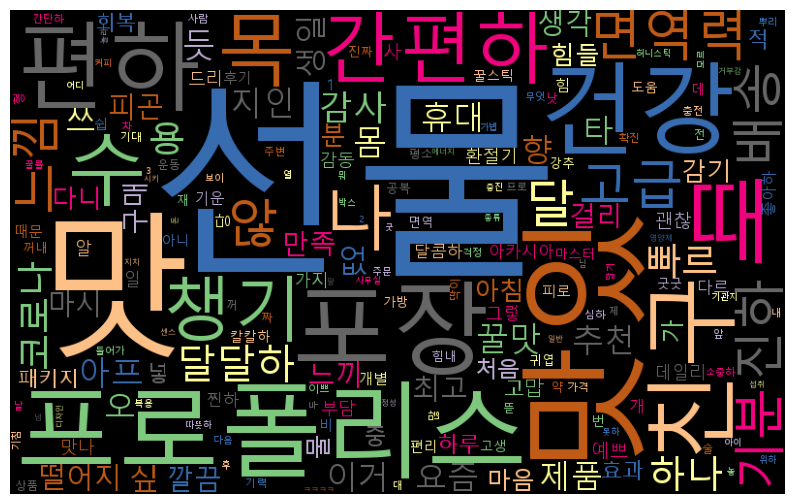

In [49]:
wc_analysis(kakao_friend['token_nouns_bareun']+kakao_friend['token_verbs_bareun'])

In [ ]:
frequency_analysis(kakao_friend['token_nouns_bareun'], 500)

In [ ]:
kakao_data['']

### 부정리뷰 분석

In [21]:
kurly_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kurly_data_preprocessed.csv", index_col=0)
workerbee_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_preprocessed.csv", index_col=0)

In [48]:
workerbee_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_preprocessed.csv", index_col=0)

컬럼명 맞춰주기 : 리뷰, 시간

In [84]:
workerbee_data.rename(columns={'contents':'ReviewText', 'insertTimestamp':'ReviewTime',
                               'itemNo':'ProductCode', 'itemName':'ProductName'}, inplace=True)

In [30]:
kurly_data.rename(columns={'ReviewDate':'ReviewTime'}, inplace=True)

In [82]:
kakao_data.rename(columns={'review_time':'ReviewTime', 'id':'ProductCode', 'name':'ProductName'}, inplace=True)

### 불용어 제거

단어변환

In [28]:
change_tokens_dict = {'거트':'요거트', '릭요거트':'요거트', '그릭요거트':'요거트', '이쁘':'예쁘', '패키징':'패키지', '패키':'패키지', '요거트볼':'요거트',
                      '요거':'요거트', '꿀요거트':'요거트', '여거트':'요거트', '이뿌':'예쁘', '기엽':'귀엽', '예뿌':'예쁘', '않':'아니', '제주벌꿀':'제주',
                      '쥬스':'주스', '맛있':'맛'}

In [29]:
def change_token(data, change_dict):
    data['token_nouns_bareun'] = data['token_nouns_bareun'].apply(lambda x:[change_tokens_dict[token] if token in change_tokens_dict.keys() else token for token in x])
    data['token_verbs_bareun'] = data['token_verbs_bareun'].apply(lambda x:[change_tokens_dict[token] if token in change_tokens_dict.keys() else token for token in x])

In [30]:
for data in [kurly_data, workerbee_data, kakao_data]:
    change_token(data, change_tokens_dict)

In [19]:
kurly_data.iloc[3536, :]

ProductCode                                     5026039
MemberGrade                                          일반
MemberName                                          임**
ProductName                    [제주벌꿀영농조합법인] 제주 벌꿀 (스틱형)
ReviewText            그릭요거트랑 먹으려고 샀어요! 패키지도 이뿌고 잘 산거같아요
ReviewTime                                   2021.06.04
ReviewLike                                            0
sentiment_label                                       1
sentiment_score                                0.992798
token_nouns_bareun                       [요거트, 패키지, 산거]
token_verbs_bareun                              [사, 예쁘]
Name: 3536, dtype: object

In [ ]:
list(set(kw_in_df(kurly_data, '거트').index) - set(kw_in_nouns(kurly_data, '요거트').index))

In [ ]:
kurly_data[kurly_data['token_nouns_bareun'].apply(lambda x:'거트' in x)]

In [20]:
rm_nouns = ['것', '씩', 'ㅎ', '거', '저', 'ㅎㅎ', '들', '포', '꿀', '스틱', '구매', '용', '형', '하나', '수', '개', '소',
            '번', '1', 'ㅋ', '중', '굿', '분', '요', '편', '듯', '적', '님', '나', '제', '대', '비', '전', '뭐', '몇',
            '데', '만', '다', '떼', '날', '꺼', '겸', '점', '이', '성', '이거', 'ㅋㅋㅋㅋ', 'ㅎㅎㅎ', '등', '1', '2', '3', '디', '년',
            '그거', '재', '선물', '재재재', '벌꿀']

In [21]:
rm_verbs = ['하', '이', '있', '먹', '같', '되', '스럽', '지', '좋', '보', '받', '들', '보내', '주']

In [22]:
for data in [kurly_data, workerbee_data, kakao_data]:
    data['token_nouns_bareun'] = data['token_nouns_bareun'].apply(lambda x:[token for token in x if token not in rm_nouns])
    data['token_verbs_bareun'] = data['token_verbs_bareun'].apply(lambda x:[token for token in x if token not in rm_verbs])

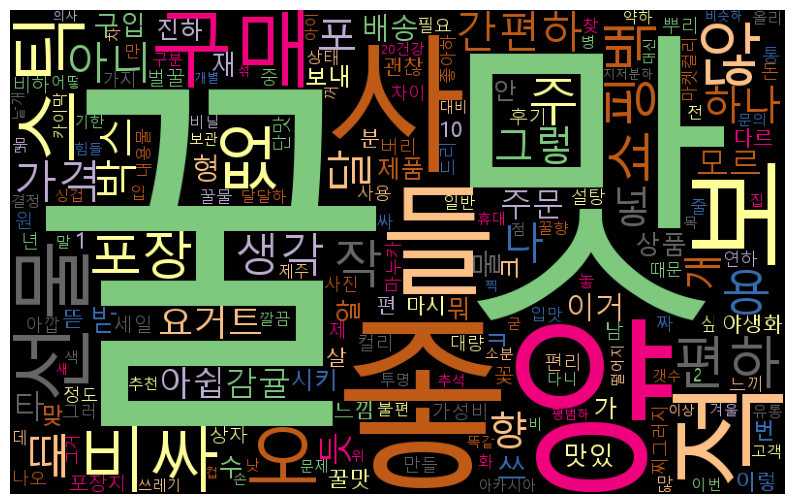

In [42]:
wc_analysis(kurly_data[kurly_data['sentiment_label']==0]['token_nouns_bareun'] + kurly_data[kurly_data['sentiment_label']==0]['token_verbs_bareun'])

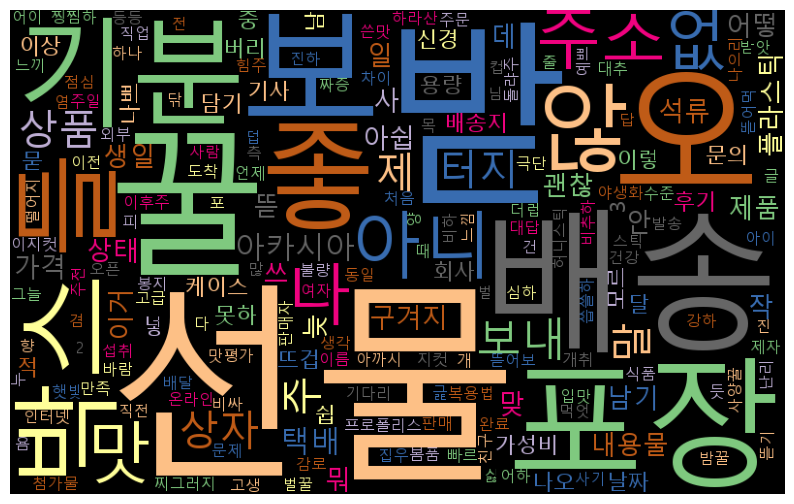

In [43]:
wc_analysis(kakao_data[kakao_data['sentiment_label']==0]['token_nouns_bareun'] + kakao_data[kakao_data['sentiment_label']==0]['token_verbs_bareun'])

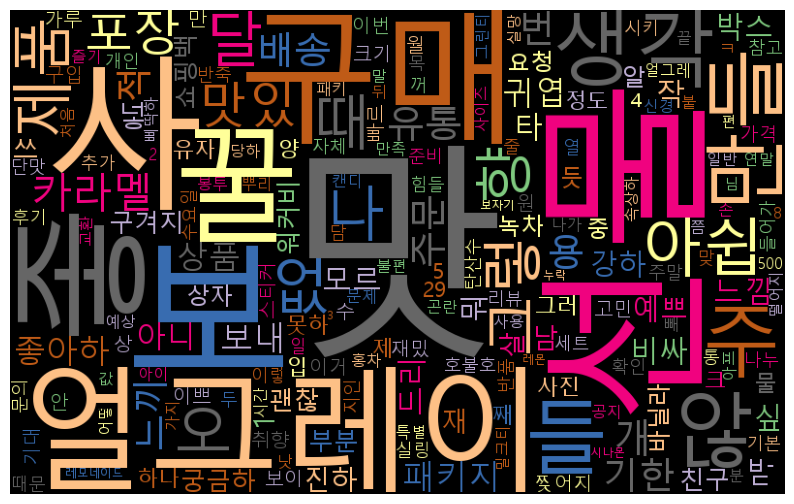

In [54]:
wc_analysis(workerbee_data[workerbee_data['sentiment_label']==0]['token_nouns_bareun'] + workerbee_data[workerbee_data['sentiment_label']==0]['token_verbs_bareun'])

In [19]:
kakao_data[kakao_data['sentiment_label']==0]['ReviewText']

193     상품은 아직 섭취전..  뜨거운 점심에 햇빛쨍해서 박스가 많이 뜨거운데 안에든 꿀은...
343     아까시 감로 피 대추 야생화 등등 별의별 꿀을 다 먹어봤지만 밤꿀보다 쓴맛이 강한 ...
468         후기 이후주는 상품은 완전 다른걸 주네요? ㅠ.  사기맞은듯 한  기분더럽습니다.
643          다른 첨가물없이 꿀과 프로폴리스만 들어있어 건강하고 진한맛 아이는 먹기 싫어함.
1040                                배송빨랐어요 포장은 글케막..예쁘진않음
1079                                   ㅡㅡ나으리 꿀이 너무달니다요 에에
1112              가성비는 만족, 배송은 동일날짜 2건의 선물을 발송 했는데 쫌 늦게 옴
1122                                          ㅠㅠ 잘 안 먹어져영
1128                                상품 안왔습니다. 왜 배송 완료인거죠?
1169                                           잘받았습니다....
1245       한컵용량의 .. 한포의 양이 너무 적어요.3개는 넣어야 맛이 좀 납니다. 아쉽네요.
1252    맛은 아직 안봐서 모르겠는데  포장좀 신경쓰세요. 저는 제가 먹으려고 주문한건데도 ...
1258                    선물로 받은건데 박스가 다 오픈되어 있는상태로 배송되어왔어요
1266                                제품박스가 다 떨어지고, 구겨져 왔어요
1278    오늘 받았습니다근데 세 봉지 중에 하나가뜯겨서  왔어요  문의글 남겼는데  아직 답...
1314                                  남에 집우로 배달온거 말곤 쵝오에염
1375    배송 상태가 너무...안 좋네요. 선물 받은 건데 상자에 담겨오긴 했지만 다 구겨지...
1394          

In [57]:
workerbee_data[workerbee_data['sentiment_label']==0]['ReviewText']

14      생각보다 제입맛에는 별로,, 근데 친구는 맛있다고 하더라고요 친구 다 줬습니다,,ㅠ...
25                                        얼그레이 향이 꽤 강해요..
47      궁금해서 사봤어요!! 생각보다 얼그레이 향이 강해요ㅎㅎ 다시 사먹을 거 같진 않아요...
52      유통기한이 촉박해요.  내일모레면 5월인데 유통기한이 8월까지인 제품이 왔어요. 두...
58      선물욘으로는 괜찮은데 솔직히 너무달아요 단 거 좋아하는 편인데도 뱉고 싶었어여 그냥...
                              ...                        
4790    구성품중 카라멜은 맛있었어요 꿀은 알수없는 까만가루가 있어  냄새만 맡고 방치  통...
4827    생각보다 되게 작네요ㅠ 선물해야하는데 겉보기에 되게 볼품없어보어요 아쉽네요 꿀로 살...
4975                                   비싼편인거 같아요 너무 작더라고요
5071    선생님께 오랜만에 만나서 드리려고 샀는데 귀엽긴한데.... 좀 약한 것 같습니다  ...
5107    친구 두명에게 선물했는데 이 친구는 별로 안 좋아 했네요. 선물로 하려면 미리 잘 ...
Name: ReviewText, Length: 145, dtype: object

In [89]:
workerbee_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_preprocessed.csv")

In [90]:
kurly_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kurly_data_preprocessed.csv")

In [91]:
kakao_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kakao_data_preprocessed.csv")

In [68]:
kakao_data.head(1)

id                                        name brand  sellingPrice  \
0  2270784  국산 프로폴리스 혼합 천연벌꿀 허니스틱(15스틱) 답례품 비마스터 -23.5  비마스터         27800   

   wishCount  reviewCount product_tag2  \
0       2228         1152           []   

                                          ReviewText  rating review_tag1  \
0  숙취후 아침에 따뜻한 물에 한포 간편히 타먹을수 있어서 좋드라구요. 스틱형이라 휴대...       4          응원   

  review_tag2           ReviewTime  sentiment_label  sentiment_score  \
0        직장동료  2023-04-10 14:16:48                1         0.990664   

                                  token_nouns_bareun  \
0  [숙취, 후, 아침, 물, 포, 수, 스틱, 형, 휴대, 물, 주머니, 가방, 안,...   

                                token_verbs_bareun  
0  [따뜻하, 타, 좋, 간편하, 녹, 간편하, 허기지, 간편하, 좋, 믿, 좋, 빠르]

In [110]:
kakao_neg = kakao_data[kakao_data['sentiment_label']==0][['ProductCode', 'ProductName', 'ReviewText', 'ReviewTime',
                                                      'sentiment_label', 'sentiment_score', 'token_nouns_bareun', 'token_verbs_bareun']]
kakao_neg['platform'] = 'kakao'

In [72]:
kurly_data.head(1)

ProductCode MemberGrade MemberName          ProductName  \
0      5136210          일반        박**  [바로생활] 아카시아꿀 스틱 10포   

                                          ReviewText  ReviewTime  ReviewLike  \
0  작은 박스로 2개 (10개씩 들어있어 20개 네요 ) 주문 했습니다.  의심이 많은...  2023.06.23           0   

   sentiment_label  sentiment_score  \
0                1          0.99409   

                                  token_nouns_bareun  \
0  [박스, 2, 개, 10, 개, 20, 개, 네, 주문, 의심, 타입, 뭐, 번, ...   

                                  token_verbs_bareun  
0  [작, 들, 많, 없, 보, 쓰, 보, 나, 없, 맏아보, 힘들, 반갑, 예쁘, 보...

In [111]:
kurly_neg = kurly_data[kurly_data['sentiment_label']==0][['ProductCode', 'ProductName', 'ReviewText', 'ReviewTime',
                                                      'sentiment_label', 'sentiment_score', 'token_nouns_bareun', 'token_verbs_bareun']]
kurly_neg['platform'] = 'kurly'

In [113]:
workerbee_neg.head(1)

ProductCode                 ProductName  \
14      1308881  [꿀카라멜] 워커비 허니 얼그레이 카라멜 50g   

                                           ReviewText           ReviewTime  \
14  생각보다 제입맛에는 별로,, 근데 친구는 맛있다고 하더라고요 친구 다 줬습니다,,ㅠ...  2023-06-29 19:31:32   

    sentiment_label  sentiment_score       token_nouns_bareun  \
14                0         0.581707  [생각, 제입, 맛, 친구, 친구, 기대]   

   token_verbs_bareun   platform  
14            [맛있, 주]  workerbee

In [109]:
workerbee_neg = workerbee_data[workerbee_data['sentiment_label']==0][['ProductCode', 'ProductName', 'ReviewText', 'ReviewTime',
                                                      'sentiment_label', 'sentiment_score', 'token_nouns_bareun', 'token_verbs_bareun']]
workerbee_neg['platform'] = 'workerbee'

In [114]:
neg_review = pd.concat([kurly_neg, workerbee_neg, kakao_neg])

In [116]:
neg_review.to_excel(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\negative_review.xlsx")

In [3]:
neg_review = pd.read_excel(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\negative_review.xlsx", index_col=0)

In [4]:
neg_review['platform'].value_counts()

platform
kurly        580
workerbee    145
kakao         41
Name: count, dtype: int64

In [126]:
neg_review[neg_review['sentiment_score']>0.9]

ProductCode                                        ProductName  \
205       5136210                                [바로생활] 아카시아꿀 스틱 10포   
209       5136210                                [바로생활] 아카시아꿀 스틱 10포   
214       5136210                                [바로생활] 아카시아꿀 스틱 10포   
343       5136210                                [바로생활] 아카시아꿀 스틱 10포   
413       5136210                                [바로생활] 아카시아꿀 스틱 10포   
...           ...                                                ...   
1858      5620838  미엘드 국내산 100% 천연 벌꿀 no.5 혼합선물세트 (허니스틱+병꿀 / 결혼식,...   
1864      2184492             "하루1포 야생화벌꿀" 허니티톡 100%국내산  천연벌꿀스틱(20포)   
1887      2184488        (1+1/총40포) "하루1포 야생화벌꿀" 허니티톡 100%국내산 천연벌꿀스틱   
1901      6651221                끌레르허니 스틱 천연벌꿀 아카시아꿀 야생화꿀 밤꿀 36포 선물용   
1910      2498998           달달한 선물 [꿀마실] 밤꿀 12g x 10포 - 천연벌꿀 데일리미니스틱   

                                             ReviewText           ReviewTime  \
205                           두번째 구입인데 이번엔 살짝 비릿한 맛이 .            2023.05.30   
209                                향좀 안나서 저는 재구매 안할거가타욤           2023.05.29   
214                           아카시아 향이 짙지 않아요. 사양벌꿀인가요?            2023.05.24   
343                          포장지 양에 맞기 만들어야함 너무 길게 만들었음           2023.04.03   
413                               음 이건 좀 비추할게요 맛이없어요 그냥           2023.03.07   
...                                                 ...                  ...   
1858                      너무 용량들이 작아서 실속은 그다지 없는 것 같아요.  2023-01-29 15:50:18   
1864  주소 배송지를 아무 주소로 보내면 어떻게여?? 택배회사가 주소 이상하다고 연락받았어...  2020-11-07 12:12:35   
1887             뭔가했더니 잡꿀이네요..달긴한데..음.굳이 내돈주고 사먹을까싶을지는.  2020-11-27 20:38:18   
1901                          이거 유통기한 지난 것 같은데 이게 맞나요??  2023-06-10 11:18:02   
1910          제가 먹으려고 샀는데 의외로 별로... 택배상자는 이디야(커피체인) 뭐지요  2021-11-12 14:41:50   

      sentiment_label  sentiment_score  \
205                 0         0.988554   
209                 0         0.943153   
214                 0         0.960166   
343                 0         0.985050   
413                 0         0.996495   
...               ...              ...   
1858                0         0.994425   
1864                0         0.996138   
1887                0         0.972345   
1901                0         0.980331   
1910                0         0.980223   

                                     token_nouns_bareun token_verbs_bareun  \
205                                   [번, 째, 구입, 이번, 맛]              [비릿하]   
209                                      [향, 재, 구매, 타욤]                [나]   
214                                     [아카시아, 향, 사양벌꿀]             [짙, 않]   
343                                            [포장지, 양]     [맞, 만들, 길, 만들]   
413                                             [이거, 맛]                [없]   
...                                                 ...                ...   
1858                                        [용량, 들, 실속]             [작, 없]   
1864  [주소, 배송지, 주소, 택배, 회사, 주소, 이상, 연락, 택배, 회사, 주소, ...     [보내, 어떻, 받, 받]   
1887                                      [뭐, 잡꿀, 나, 돈]       [달, 주, 사, 싶]   
1901                                   [이거, 유통, 기한, 이거]            [지나, 맞]   
1910                        [제, 택배, 상자, 이디야, 커피, 체인, 뭐]                [사]   

     platform  
205     kurly  
209     kurly  
214     kurly  
343     kurly  
413     kurly  
...       ...  
1858    kakao  
1864    kakao  
1887    kakao  
1901    kakao  
1910    kakao  

[363 rows x 9 columns]

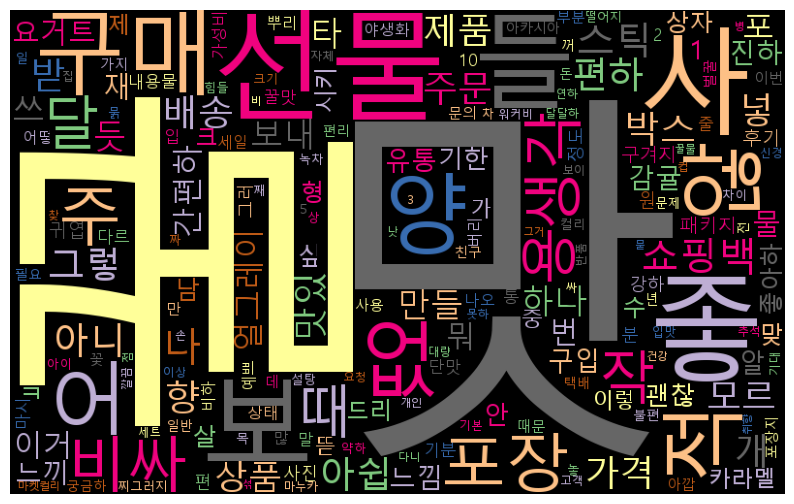

In [97]:
wc_analysis(neg_review['token_nouns_bareun'] + neg_review['token_verbs_bareun'])

In [24]:
kurly_data.head(1)

ProductCode MemberGrade MemberName          ProductName  \
0      5136210          일반        박**  [바로생활] 아카시아꿀 스틱 10포   

                                                                                                                                                                                                                                                                                                                       ReviewText  \
0  작은 박스로 2개 (10개씩 들어있어 20개 네요 ) 주문 했습니다.  의심이 많은 타입이라 뭐든 한번에 주문한적이 없고 ,,  꼭 먹어보고 써보고 나서야 안심하는 타입입니다 ㅋ    요즘은..아카시아가 많이 없어 ..  아카시아 향 맏아보기도 정말 힘든데.. 아카시아 꿀이라니  ^^  너무 반갑고 예뻐 주문해 봤습니다.   일단 너무 작고 예쁘네요 .  더운 여름에 밖에서 운동하는 딸을 위해 건강한 간식으로  챙겨 주려고 합니다.   예쁜 포장이라 예민한 아이 마음에도 쏙 드는 듯 합니다.   배송도 빠르고 좋은제품 좋은 가격에 잘 산걸 같아  기분 좋네요.^^   

   ReviewTime  ReviewLike  sentiment_label  sentiment_score  \
0  2023.06.23           0                1          0.99409   

                                                                                                       token_nouns_bareun  \
0  [박스, 10, 20, 네, 주문, 의심, 타입, 주문, 안심, 타입, 요즘, 아카시아, 아카시아, 향, 아카시아, 주문, 여름, 밖, 운동, 딸, 건강, 간식, 포장, 아이, 마음, 배송, 제품, 가격, 기분]   

                                                      token_verbs_bareun  
0  [작, 많, 없, 쓰, 나, 없, 맏아보, 힘들, 반갑, 예쁘, 작, 예쁘, 덥, 위하, 챙기, 예쁘, 예민하, 빠르, 살]

In [42]:
frequency_analysis(kurly_data['tokens'], 20)

Token  Frequency
0      맛       2248
1     편하       1747
2    간편하       1545
3    요거트       1489
4      사       1180
5     포장        931
6      넣        690
7     뿌리        631
8     아니        604
9      양        481
10     쓰        413
11    편리        406
12    사용        405
13     달        383
14    휴대        363
15    깔끔        361
16    구입        344
17     타        341
18     향        333
19    주문        324

In [44]:
1489/len(kurly_data)

0.13975971466116013

In [105]:
frequency_analysis(neg_review['token_nouns_bareun'], 500).head(10)

Token  Frequency
0     맛        182
1     꿀        172
2    선물        127
3    구매         93
4     양         87
5    포장         73
6    생각         61
7     용         60
8   쇼핑백         56
9     때         55

포장 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


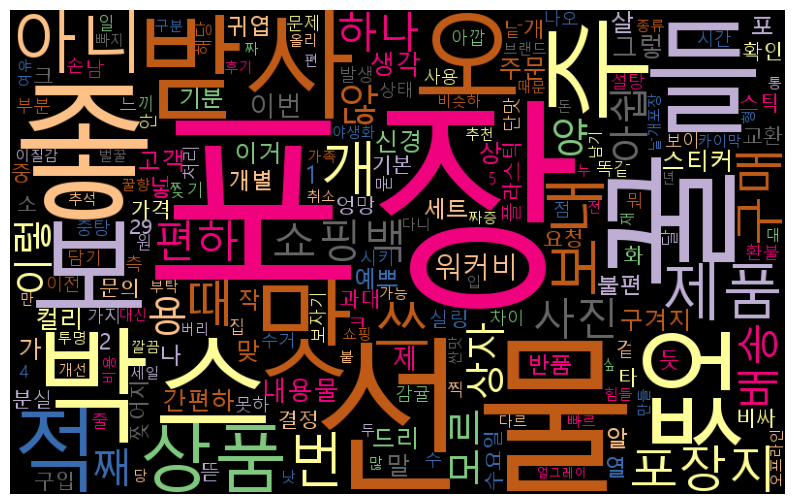

In [108]:
wc_kw(neg_review, 3, '포장')

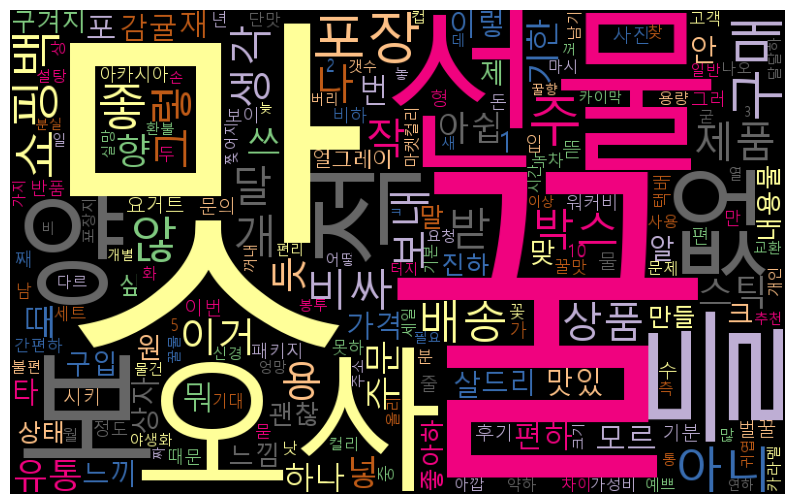

In [127]:
wc_analysis(neg_review[neg_review['sentiment_score']>0.9]['token_nouns_bareun'] + neg_review[neg_review['sentiment_score']>0.9]['token_verbs_bareun'])

In [436]:
kakao_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kakao_data_analysis.csv")
kurly_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kurly_data_analysis.csv")
workerbee_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_analysis.csv")

In [23]:
kakao_data.to_excel(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\excel\kakao_analysis.xlsx")

### 컬리 리뷰 레시피 분석

In [ ]:
yogurt = ['요거트', '요플레']
tea = ['꿀물', '물', '꿀차', '차', '생강차', '녹차']
kaymak = ['카이막']
pizza = ['피자']
shake = ['미숫가루', '선식', '우유']
salad = ['샐러드']
cheese = ['치즈', '브리치즈', '부라타치즈', '크림치즈']
fruit = ['과일', '토마토', '복숭아', '블루베리', '바나나', '딸기']
ricecake = ['가래떡']
nut = ['견과']
bread = ['빵', '샌드위치', '토스트']
coffee = ['커피']
etc = ['홍삼']

### 브랜딩 분석

In [17]:
kurly_data.head(1)

ProductCode MemberGrade MemberName          ProductName  \
0      5136210          일반        박**  [바로생활] 아카시아꿀 스틱 10포   

                                                                                                                                                                                                                                                                                                                       ReviewText  \
0  작은 박스로 2개 (10개씩 들어있어 20개 네요 ) 주문 했습니다.  의심이 많은 타입이라 뭐든 한번에 주문한적이 없고 ,,  꼭 먹어보고 써보고 나서야 안심하는 타입입니다 ㅋ    요즘은..아카시아가 많이 없어 ..  아카시아 향 맏아보기도 정말 힘든데.. 아카시아 꿀이라니  ^^  너무 반갑고 예뻐 주문해 봤습니다.   일단 너무 작고 예쁘네요 .  더운 여름에 밖에서 운동하는 딸을 위해 건강한 간식으로  챙겨 주려고 합니다.   예쁜 포장이라 예민한 아이 마음에도 쏙 드는 듯 합니다.   배송도 빠르고 좋은제품 좋은 가격에 잘 산걸 같아  기분 좋네요.^^   

   ReviewTime  ReviewLike  sentiment_label  sentiment_score  \
0  2023.06.23           0                1          0.99409   

                                                                                                                                                                      token_nouns_bareun  \
0  ['박스', '2', '10', '20', '네', '주문', '의심', '타입', '주문', '안심', '타입', '요즘', '아카시아', '아카시아', '향', '아카시아', '주문', '여름', '밖', '운동', '딸', '건강', '간식', '포장', '아이', '마음', '배송', '제품', '가격', '기분']   

                                                                                            token_verbs_bareun  
0  ['작', '많', '없', '쓰', '나', '없', '맏아보', '힘들', '반갑', '예쁘', '작', '예쁘', '덥', '위하', '챙기', '예쁘', '예민하', '빠르', '살']

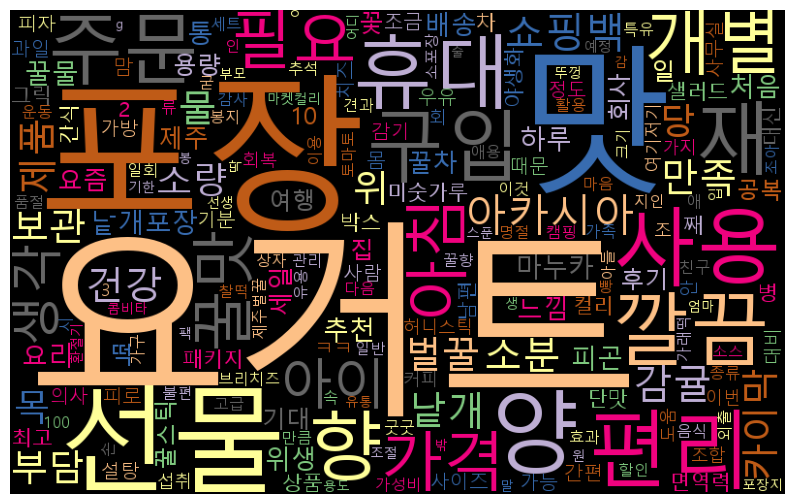

In [30]:
wc_analysis(kurly_data['token_nouns_bareun'])

In [29]:
frequency_analysis(kurly_data['token_nouns_bareun'], 20)

Token  Frequency
0    요거트       1488
1     포장        931
2      맛        860
3     선물        804
4      양        481
5     편리        406
6     사용        405
7     휴대        363
8     깔끔        359
9      재        350
10    구입        344
11     향        332
12    주문        324
13    개별        272
14    필요        224
15    아침        221
16    가격        212
17    꿀맛        205
18    아이        180
19    생각        167

In [65]:
kw_rate_list(kurly_jeju, ['맛', '건강', '제주', '천연', '감귤', '요거트', '깔끔', '아이', '향', '아침', '가격', '양', '포장', '패키지', '선물', '고급', '예쁘', '깔끔', '귀엽'])

전체 리뷰 5472 건 중 " 맛 " 가 포함된 리뷰 비율 : 8.64 %
전체 리뷰 5472 건 중 " 건강 " 가 포함된 리뷰 비율 : 0.8 %
전체 리뷰 5472 건 중 " 제주 " 가 포함된 리뷰 비율 : 1.24 %
전체 리뷰 5472 건 중 " 천연 " 가 포함된 리뷰 비율 : 0.02 %
전체 리뷰 5472 건 중 " 감귤 " 가 포함된 리뷰 비율 : 2.14 %
전체 리뷰 5472 건 중 " 요거트 " 가 포함된 리뷰 비율 : 13.6 %
전체 리뷰 5472 건 중 " 깔끔 " 가 포함된 리뷰 비율 : 3.38 %
전체 리뷰 5472 건 중 " 아이 " 가 포함된 리뷰 비율 : 1.77 %
전체 리뷰 5472 건 중 " 향 " 가 포함된 리뷰 비율 : 2.94 %
전체 리뷰 5472 건 중 " 아침 " 가 포함된 리뷰 비율 : 1.74 %
전체 리뷰 5472 건 중 " 가격 " 가 포함된 리뷰 비율 : 1.55 %
전체 리뷰 5472 건 중 " 양 " 가 포함된 리뷰 비율 : 5.04 %
전체 리뷰 5472 건 중 " 포장 " 가 포함된 리뷰 비율 : 8.39 %
전체 리뷰 5472 건 중 " 패키지 " 가 포함된 리뷰 비율 : 0.27 %
전체 리뷰 5472 건 중 " 선물 " 가 포함된 리뷰 비율 : 1.28 %
전체 리뷰 5472 건 중 " 고급 " 가 포함된 리뷰 비율 : 0.13 %
전체 리뷰 5472 건 중 " 예쁘 " 가 포함된 리뷰 비율 : 0.2 %
전체 리뷰 5472 건 중 " 깔끔 " 가 포함된 리뷰 비율 : 3.38 %
전체 리뷰 5472 건 중 " 귀엽 " 가 포함된 리뷰 비율 : 0.49 %


In [64]:
kw_rate_list(kurly_data, ['맛', '건강', '제주', '천연', '요거트', '깔끔', '아이', '향', '아침', '가격', '양', '포장', '패키지', '선물', '고급', '예쁘', '깔끔', '귀엽', '친구'])

전체 리뷰 10654 건 중 " 맛 " 가 포함된 리뷰 비율 : 7.71 %
전체 리뷰 10654 건 중 " 건강 " 가 포함된 리뷰 비율 : 1.16 %
전체 리뷰 10654 건 중 " 제주 " 가 포함된 리뷰 비율 : 0.65 %
전체 리뷰 10654 건 중 " 천연 " 가 포함된 리뷰 비율 : 0.01 %
전체 리뷰 10654 건 중 " 요거트 " 가 포함된 리뷰 비율 : 13.53 %
전체 리뷰 10654 건 중 " 깔끔 " 가 포함된 리뷰 비율 : 3.37 %
전체 리뷰 10654 건 중 " 아이 " 가 포함된 리뷰 비율 : 1.66 %
전체 리뷰 10654 건 중 " 향 " 가 포함된 리뷰 비율 : 2.83 %
전체 리뷰 10654 건 중 " 아침 " 가 포함된 리뷰 비율 : 2.04 %
전체 리뷰 10654 건 중 " 가격 " 가 포함된 리뷰 비율 : 1.93 %
전체 리뷰 10654 건 중 " 양 " 가 포함된 리뷰 비율 : 4.39 %
전체 리뷰 10654 건 중 " 포장 " 가 포함된 리뷰 비율 : 8.64 %
전체 리뷰 10654 건 중 " 패키지 " 가 포함된 리뷰 비율 : 0.57 %
전체 리뷰 10654 건 중 " 선물 " 가 포함된 리뷰 비율 : 6.94 %
전체 리뷰 10654 건 중 " 고급 " 가 포함된 리뷰 비율 : 0.31 %
전체 리뷰 10654 건 중 " 예쁘 " 가 포함된 리뷰 비율 : 0.87 %
전체 리뷰 10654 건 중 " 깔끔 " 가 포함된 리뷰 비율 : 3.37 %
전체 리뷰 10654 건 중 " 귀엽 " 가 포함된 리뷰 비율 : 0.45 %
전체 리뷰 10654 건 중 " 친구 " 가 포함된 리뷰 비율 : 0.27 %


In [58]:
kw_rate_list(kakao_data, ['건강', '제주', '천연', '요거트', '깔끔', '아이', '향', '아침', '가격', '양', '포장', '패키지', '선물', '고급', '예쁘', '깔끔', '귀엽'])

전체 리뷰 1922 건 중 " 건강 " 가 포함된 리뷰 비율 : 16.49 %
전체 리뷰 1922 건 중 " 제주 " 가 포함된 리뷰 비율 : 0.16 %
전체 리뷰 1922 건 중 " 천연 " 가 포함된 리뷰 비율 : 0.47 %
전체 리뷰 1922 건 중 " 요거트 " 가 포함된 리뷰 비율 : 0.68 %
전체 리뷰 1922 건 중 " 깔끔 " 가 포함된 리뷰 비율 : 3.12 %
전체 리뷰 1922 건 중 " 아이 " 가 포함된 리뷰 비율 : 0.68 %
전체 리뷰 1922 건 중 " 향 " 가 포함된 리뷰 비율 : 3.69 %
전체 리뷰 1922 건 중 " 아침 " 가 포함된 리뷰 비율 : 2.19 %
전체 리뷰 1922 건 중 " 가격 " 가 포함된 리뷰 비율 : 0.68 %
전체 리뷰 1922 건 중 " 양 " 가 포함된 리뷰 비율 : 0.78 %
전체 리뷰 1922 건 중 " 포장 " 가 포함된 리뷰 비율 : 13.89 %
전체 리뷰 1922 건 중 " 패키지 " 가 포함된 리뷰 비율 : 1.61 %
전체 리뷰 1922 건 중 " 선물 " 가 포함된 리뷰 비율 : 41.78 %
전체 리뷰 1922 건 중 " 고급 " 가 포함된 리뷰 비율 : 6.61 %
전체 리뷰 1922 건 중 " 예쁘 " 가 포함된 리뷰 비율 : 1.72 %
전체 리뷰 1922 건 중 " 깔끔 " 가 포함된 리뷰 비율 : 3.12 %
전체 리뷰 1922 건 중 " 귀엽 " 가 포함된 리뷰 비율 : 1.35 %


In [59]:
kw_rate_list(workerbee_data, ['건강', '제주', '천연', '요거트', '깔끔', '아이', '향', '아침', '가격', '양', '포장', '패키지', '선물', '고급', '예쁘', '깔끔', '귀엽'])

전체 리뷰 5110 건 중 " 건강 " 가 포함된 리뷰 비율 : 2.21 %
전체 리뷰 5110 건 중 " 제주 " 가 포함된 리뷰 비율 : 0.04 %
전체 리뷰 5110 건 중 " 천연 " 가 포함된 리뷰 비율 : 0.06 %
전체 리뷰 5110 건 중 " 요거트 " 가 포함된 리뷰 비율 : 2.13 %
전체 리뷰 5110 건 중 " 깔끔 " 가 포함된 리뷰 비율 : 2.54 %
전체 리뷰 5110 건 중 " 아이 " 가 포함된 리뷰 비율 : 1.53 %
전체 리뷰 5110 건 중 " 향 " 가 포함된 리뷰 비율 : 5.69 %
전체 리뷰 5110 건 중 " 아침 " 가 포함된 리뷰 비율 : 0.29 %
전체 리뷰 5110 건 중 " 가격 " 가 포함된 리뷰 비율 : 2.76 %
전체 리뷰 5110 건 중 " 양 " 가 포함된 리뷰 비율 : 1.72 %
전체 리뷰 5110 건 중 " 포장 " 가 포함된 리뷰 비율 : 10.08 %
전체 리뷰 5110 건 중 " 패키지 " 가 포함된 리뷰 비율 : 20.31 %
전체 리뷰 5110 건 중 " 선물 " 가 포함된 리뷰 비율 : 60.1 %
전체 리뷰 5110 건 중 " 고급 " 가 포함된 리뷰 비율 : 1.68 %
전체 리뷰 5110 건 중 " 예쁘 " 가 포함된 리뷰 비율 : 13.19 %
전체 리뷰 5110 건 중 " 깔끔 " 가 포함된 리뷰 비율 : 2.54 %
전체 리뷰 5110 건 중 " 귀엽 " 가 포함된 리뷰 비율 : 21.57 %


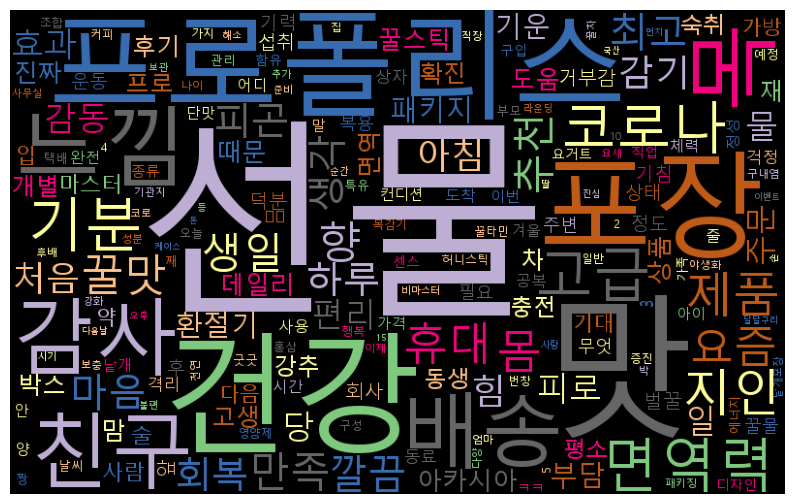

In [31]:
wc_analysis(kakao_data['token_nouns_bareun'])

In [32]:
frequency_analysis(kakao_data['token_nouns_bareun'], 20)

Token  Frequency
0      선물        976
1       맛        471
2      건강        336
3   프로폴리스        300
4      포장        291
5       목        170
6      느낌        154
7      감사        140
8      배송        136
9      친구        136
10    면역력        134
11     고급        132
12     기분        130
13    코로나        118
14     지인         93
15     제품         87
16      몸         80
17     휴대         77
18      향         77
19     꿀맛         75

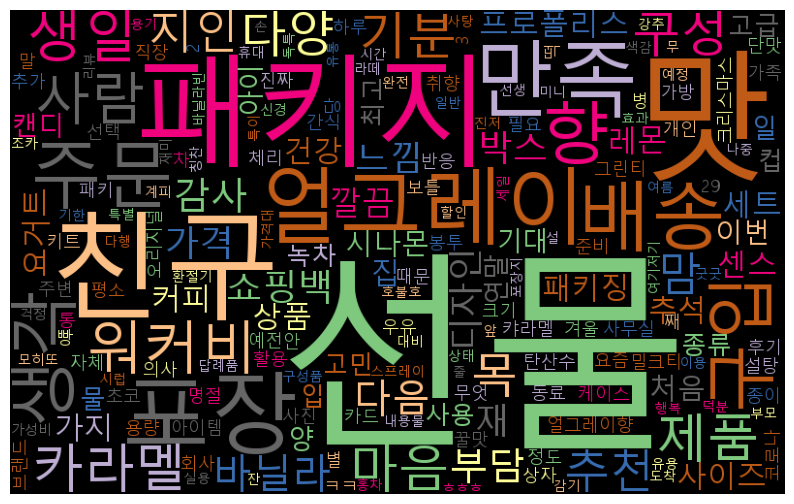

In [33]:
wc_analysis(workerbee_data['token_nouns_bareun'])

In [34]:
frequency_analysis(workerbee_data['token_nouns_bareun'], 20)

Token  Frequency
0     선물       4361
1      맛       1530
2    패키지       1065
3     친구        997
4     포장        537
5     만족        450
6   얼그레이        448
7     배송        361
8     주문        334
9      향        314
10    구입        314
11    생각        309
12   워커비        298
13    생일        278
14    사람        275
15   카라멜        258
16    제품        256
17    마음        245
18    기분        231
19    구성        220

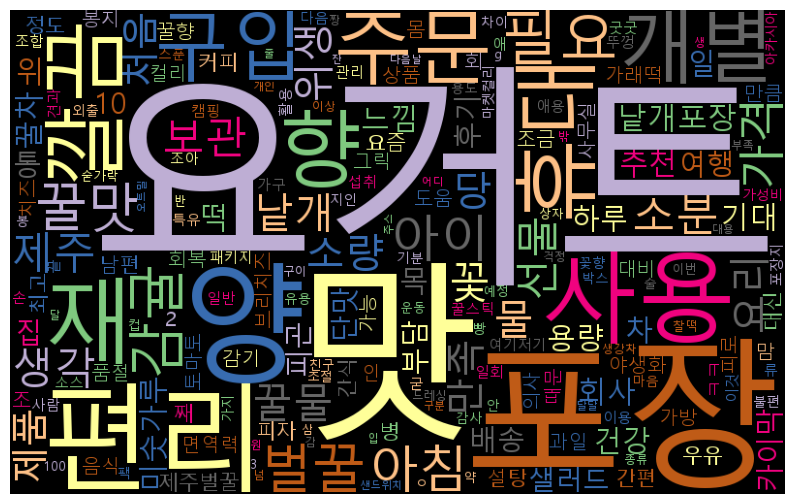

In [40]:
wc_analysis(kurly_jeju['token_nouns_bareun'])

In [56]:
frequency_analysis(kurly_jeju['token_nouns_bareun'], 20)

Token  Frequency
0    요거트        767
1      맛        502
2     포장        462
3      양        288
4     편리        251
5     사용        248
6      재        217
7     깔끔        187
8      향        186
9     휴대        182
10    주문        163
11    개별        161
12    구입        146
13    필요        136
14    감귤        133
15    벌꿀        113
16    꿀맛        109
17    아이         98
18    아침         97
19    가격         87

In [ ]:
kakao_data[kakao_data['ProductCode']==2270784]

In [74]:
kw_in_token(kakao_data, '골드')

전체 리뷰 1922 건 중 ' 골드 ' 가 포함된 리뷰 총 1 건


998    배송이 정말 빠르네요~ 우선 포장이 블랙+골드여서 더 고급지네요~ 먹기도 엄청 편하고!! 선물로 받아서 기분 좋은데 포장도 이쁘고 맛도 진하고!! 면역력 떨어졌을때 먹기쉬울꺼 같아요!! 휴대하기 엄청 편해요~~
Name: ReviewText, dtype: object

### 마켓컬리 요거트 분석

In [35]:
kw_in_token(kurly_data, '요거트')

전체 리뷰 10654 건 중 ' 요거트 ' 가 포함된 리뷰 총 1441 건


6                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  그릭 요거트에 넣어서 잘 먹고있어용
11                                                                                                                                                                                                                                                                                                                                                                                               

요거트 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


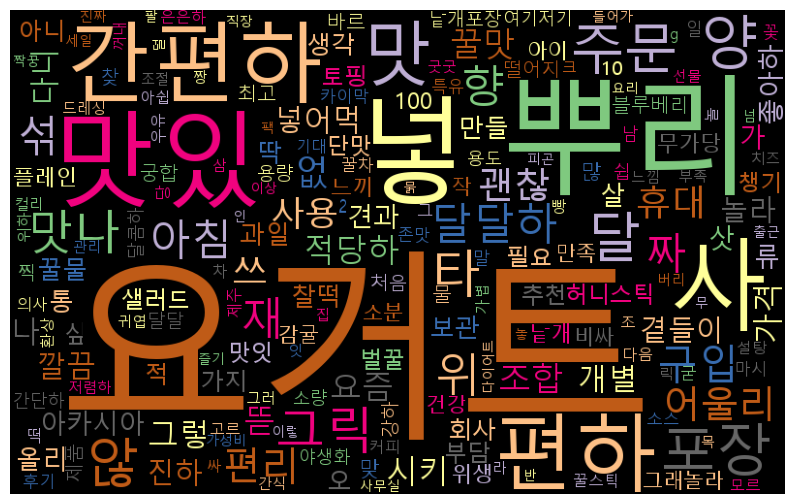

In [36]:
wc_kw(kurly_data, 3, '요거트')

In [14]:
workerbee_data['ProductName'].unique()

array(['[꿀카라멜] 워커비 허니 얼그레이 카라멜 50g', '[꿀선물] 워커비 기프트세트 미니자(3-4개입)',
       '[꿀선물] 워커비 기프트세트 미니팩', '[건강기능식품] 워커비 프로폴리스 스프레이 20ml',
       '[꿀선물] 워커비 기프트세트 미니자(8개입)', '[꿀선물] 워커비 기프트세트 콤보',
       '[핑크레몬꿀] 워커비 보틀 핑크레모네이드 355g', '[머그컵] 워커비 머그 12oz',
       '[레몬꿀] 워커비 미니팩 레몬 120g(10gx12ea)', '워커비 허니 레몬 30g',
       '[29CM 단독] 워커비 해피팩', '[29CM 단독] 워커비 더블 미니팩(6개입x2)',
       '[꿀선물] 워커비 기프트세트 보틀', '[바닐라꿀] 워커비 보틀 바닐라 355g', '워커비 허니 얼그레이 30g',
       '[얼그레이꿀] 워커비 보틀 얼그레이 355g', '[모히또꿀] 워커비 허니 모히또 355g', '쇼핑백 2종',
       '[레몬꿀] 워커비 보틀 레몬 355g', '[아카시아꿀] 워커비 보틀 오리지널 355g',
       '[유자꿀] 워커비 허니 유자 355g', '[초코꿀] 워커비 미니팩 초코 120g(10gx12ea)',
       '[초코꿀] 워커비 보틀 초코 355g', '[밀랍초] 워커비 해피 허니 캔들', '워커비 허니 시나몬 30g',
       '[계피꿀] 워커비 보틀 시나몬 355g', '[그린티꿀] 워커비 보틀 그린티(말차) 355g',
       '[바닐라꿀] 워커비 미니팩 바닐라 120g(10gx12ea)',
       '[계피꿀] 워커비 미니팩 시나몬 120g(10gx12ea)', '워커비 허니 초코 30g',
       '워커비 허니 바닐라 30g', '워커비 허니 진저 30g', '워커비 허니 모히또 30g',
       '워커비 허니 오리지널 30g', '[생강꿀] 워커비 보틀 진저 355g', '[꿀선물] 허니 홈카페 키트',
 

In [28]:
kw_in_token(workerbee_data, '양')

전체 리뷰 5110 건 중 ' 양 ' 가 포함된 리뷰 총 88 건


236                                                                                                                                            항상 얼그레이 카라멜 맛이 궁금했는데 상상이상으로 맛있던데요~ 양이 작을 것 같아서 아예 한박스 주문했는데 너무 잘 한듯 합니다!! 가방에 하나씩 넣고 다니면서 맛나게 먹을께요!!
361                                                                                        배송도 안전하고 빠르게 왔어요. 날이 덥지 않아서 상태도 모두 좋았고요. 카라멜 텍스쳐에 얼그레이 향이 진한 밀크티 압축해놓은 맛이에요. 아쉬운 건 나름 홍차니까 카페인 함량이 궁금하긴한데(그정도양은아닌건지) 조심해서 먹고있어요. 다른 사람들한테 가볍게 선물하기도 좋아요.
700                                                                                                                                                                                 얼그레이 차를 좋아해서 맛있게먹었어요 양 대비 가격이 저렴한편은 아니지만 부드럽고 향긋해서 다음에도 구매의향있어요
824                                                                                                                                            여름에 태어난 친구를 위한 선물로 건강하고 시원하게 먹으라고 주문해봤어요. 모히또 큰거 사려다가 다른 맛도 궁금해서 여러가지 패키지로 구매했는데 양은 조금 적지만 포장이 귀엽네요.
831                     

양 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


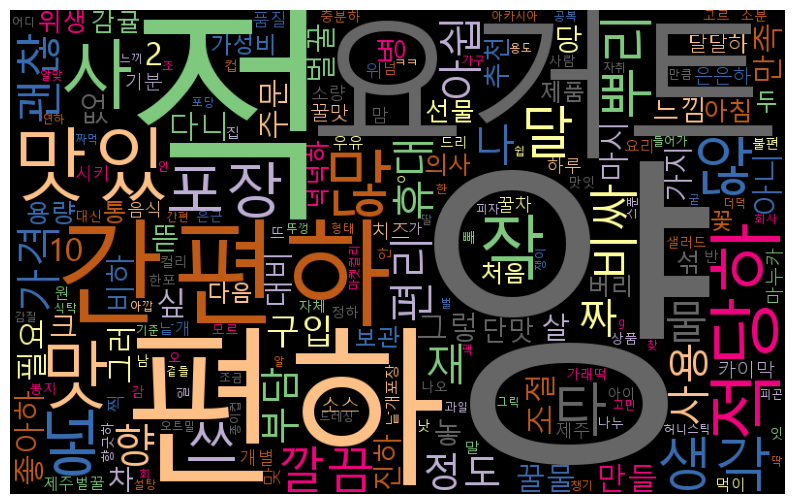

In [38]:
wc_kw(kurly_data, 3, '양')

양 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


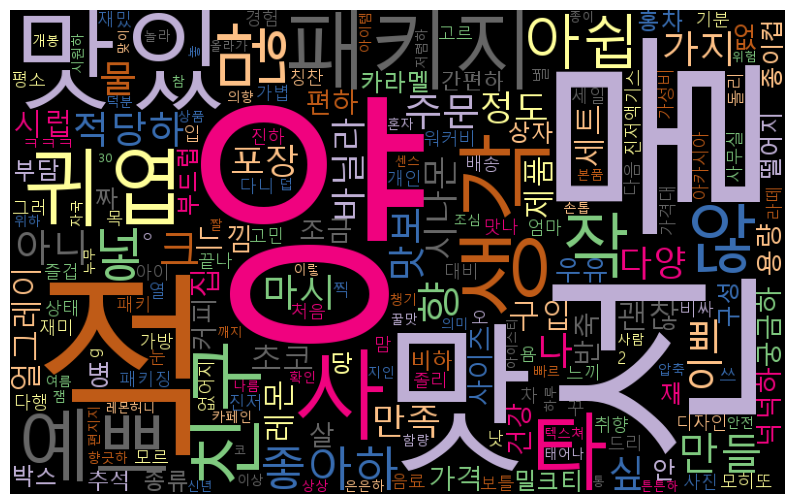

In [35]:
wc_kw(workerbee_data, 3, '양')

### 용언 어미 추가

In [36]:
kurly_data['token_verbs_bareun'] = kurly_data['token_verbs_bareun'].apply(lambda x:[x_token+'다' for x_token in x])
kakao_data['token_verbs_bareun'] = kakao_data['token_verbs_bareun'].apply(lambda x:[x_token+'다' for x_token in x])
workerbee_data['token_verbs_bareun'] = workerbee_data['token_verbs_bareun'].apply(lambda x:[x_token+'다' for x_token in x])

In [39]:
kurly_data[kurly_data['ProductCode']==5136211].head(1)

ProductCode MemberGrade MemberName         ProductName  \
6199      5136211         멤버스        김**  [바로생활] 야생화꿀 스틱 10포   

                   ReviewText  ReviewTime  ReviewLike  sentiment_label  \
6199  조금 달아요 근데 정말 뒷맛이 깔끔합니다~  2023.08.15           0                1   

      sentiment_score token_nouns_bareun token_verbs_bareun  
6199          0.92494               [뒷맛]         [달다, 깔끔하다]

In [41]:
kurly_data[kurly_data['token_nouns_bareun'].apply(lambda x:'요거트' in x)].to_excel(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\analysis\temp.xlsx")

In [31]:
for code in kurly_data['ProductCode'].unique():
    print(code)
    print(len(kurly_data[kurly_data['ProductCode']==code]),'개 리뷰 중', kw_rate(kurly_data[kurly_data['ProductCode']==code], '요거트')*100, '%')

5136210
727 개 리뷰 중 17.88 %
5026039
5472 개 리뷰 중 13.600000000000001 %
5136211
468 개 리뷰 중 18.38 %
5136213
174 개 리뷰 중 11.49 %
5052665
1285 개 리뷰 중 12.370000000000001 %
5057627
733 개 리뷰 중 0.8200000000000001 %
1000147812
11 개 리뷰 중 9.09 %
5043945
666 개 리뷰 중 39.79 %
1000015810
50 개 리뷰 중 0.0 %
5112333
8 개 리뷰 중 0.0 %
5112332
34 개 리뷰 중 8.82 %
5009728
366 개 리뷰 중 3.83 %
5122538
41 개 리뷰 중 7.32 %
5041269
491 개 리뷰 중 2.04 %
5106500
15 개 리뷰 중 0.0 %
5106501
9 개 리뷰 중 0.0 %
1000015814
12 개 리뷰 중 0.0 %
5112532
92 개 리뷰 중 0.0 %


In [ ]:
kurly_data['tokens'] = kurly_data[]

In [ ]:
workerbee_data

In [55]:
fq = frequency_analysis(kurly_data['token_nouns_bareun'], 10)

In [67]:
print(str(len(workerbee_data))+'개 리뷰 중', "'선물' 키워드 포함 리뷰 비율 :", kw_rate(workerbee_data, '분')*100, '%')

5110개 리뷰 중 '선물' 키워드 포함 리뷰 비율 : 0.0 %


In [ ]:
who_friend = ['친구','동생','베프','여친','남친','동료','누나','오빠','청년', '젊은', '20대', '30대', '연인'] #1 또래
who_mam = ['삼촌','이모','고모','상사','엄마','어머니', '아빠','아버지','아부지', '할아버지', '할머니', '부모','엄빠', '조부모','어른','어르신','시부모','시어머','시아버'] # 2 어른
who_kid = ['어린이', '아이', '자녀', '아들', '딸','아기','애기'] # 3 아이

In [44]:
kurly_data.head(1)

ProductCode MemberGrade MemberName          ProductName  \
0      5136210          일반        박**  [바로생활] 아카시아꿀 스틱 10포   

                                                                                                                                                                                                                                                                                                                       ReviewText  \
0  작은 박스로 2개 (10개씩 들어있어 20개 네요 ) 주문 했습니다.  의심이 많은 타입이라 뭐든 한번에 주문한적이 없고 ,,  꼭 먹어보고 써보고 나서야 안심하는 타입입니다 ㅋ    요즘은..아카시아가 많이 없어 ..  아카시아 향 맏아보기도 정말 힘든데.. 아카시아 꿀이라니  ^^  너무 반갑고 예뻐 주문해 봤습니다.   일단 너무 작고 예쁘네요 .  더운 여름에 밖에서 운동하는 딸을 위해 건강한 간식으로  챙겨 주려고 합니다.   예쁜 포장이라 예민한 아이 마음에도 쏙 드는 듯 합니다.   배송도 빠르고 좋은제품 좋은 가격에 잘 산걸 같아  기분 좋네요.^^   

   ReviewTime  ReviewLike  sentiment_label  sentiment_score  \
0  2023.06.23           0                1          0.99409   

                                                                                                          token_nouns_bareun  \
0  [박스, 2, 10, 20, 네, 주문, 의심, 타입, 주문, 안심, 타입, 요즘, 아카시아, 아카시아, 향, 아카시아, 주문, 여름, 밖, 운동, 딸, 건강, 간식, 포장, 아이, 마음, 배송, 제품, 가격, 기분]   

                                                                         token_verbs_bareun  
0  [작다, 많다, 없다, 쓰다, 나다, 없다, 맏아보다, 힘들다, 반갑다, 예쁘다, 작다, 예쁘다, 덥다, 위하다, 챙기다, 예쁘다, 예민하다, 빠르다, 살다]

In [57]:
wc_kw(kurly_data, 3, '요거트')

요거트 키워드가 포함된 리뷰의 용언+명사 워드클라우드 시각화


KeyError: 'tokens'